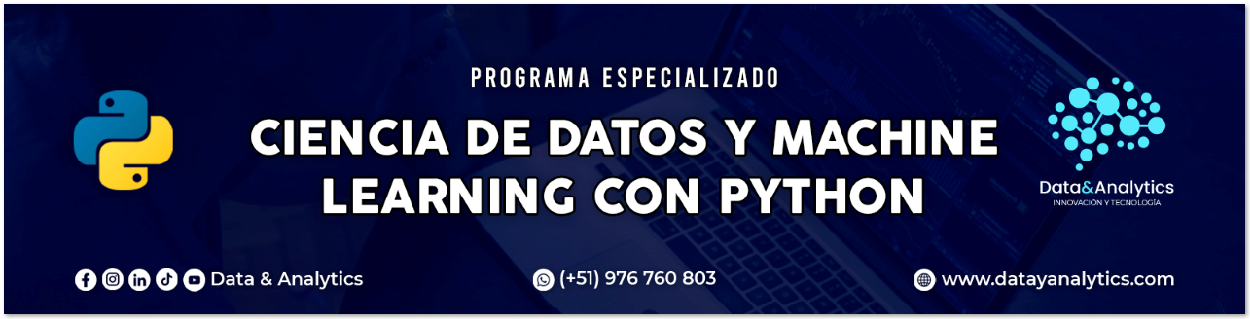

#DATA & ANALYTICS



----------------------------
SESIÓN N°5: Algoritmos de Machine Learning para Clasificación

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

## **CASO: Predecir la posibilidad de una Cancelación de un Reserva de Hotel** 
### Machine Learning en el Turismo
Unas de las tareas que nos plantearon era la predicción de cancelación de reservas de hoteles. Hoy en día este tema es muy común en el sector del Turismo. Desde el punto de vista del negocio, la detección anticipada de cancelaciones de reservas permite a la empresa adelantarse y actuar de forma preventiva, ya que le ofrece más flexibilidad y capacidad de adaptación a, por ejemplo, el overbooking.

En esta ocasión, intentamos construir nuestro propio modelo predictivo con el historial de reservas que tenemos.

**¿Qué es el Machine Learning?**
El Machine Learning es una disciplina científica que explora la construcción y estudio de algoritmos que aprenden de los datos. Estos algoritmos conforman un modelo basándose en los datos y lo usan a la hora de hacer predicciones. En nuestro caso, los datos fueron el historial de reservas del cliente. Y con ellos, nuestro algoritmo aprendera qué patrones siguen las reservas que se van a cancelar.

“Los algoritmos de machine learning exploran los datos, descubren patrones en ellos, y utilizan esos patrones para clasificar nuevos casos”

**Análisis de resultados**
Una vez construido el modelo, realizamos una evaluación para medir su calidad. El procedimiento consiste en hacer predicciones de un conjunto de nuevas reservas de las que se sabe de antemano si han sido o no canceladas. Una vez realizadas las predicciones, para medir el rendimiento del modelo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando las librerias

In [ ]:
# Manipulación y tratamiento de los Datos
import numpy as np
import pandas as pd

# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import os
import scipy as sp

# Tratamiento y manipulación de Fechas
import datetime

#Visualizamos todas las columnas
pd.set_option('display.max_columns',None)

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[texto del enlace](https://)# Cargando el Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning con Python/DATA/hotel_booking.csv")
#df.head()

In [ ]:
df.shape

(119390, 36)

## Información de la Data

Nombre de la característica | Tipo | Descripción
------------------|------------------|----------------- --
ADR|Flotador|Tarifa Promedio Diaria. Calculado dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estancia.
Adultos|Entero|Número de adultos.
Agente|Flotante|ID de la agencia de viajes que realizó la reserva.
ArrivalDateDayOfMonth|Integer|Día del mes de la fecha de llegada.
ArrivalDateMonth|Object|Mes de la fecha de llegada con 12 categorías: “Enero” a “Diciembre”.
ArrivalDateWeekNumber|Integer|Número de semana de la fecha de llegada.
ArrivalDateYear|Integer|Año de la fecha de llegada.
AssignedRoomType|Object|Código del tipo de habitación asignado a la reserva. En ocasiones, el tipo de habitación asignado difiere del tipo de habitación reservado debido a razones de funcionamiento del hotel (por ejemplo, overbooking) o por solicitud del cliente. El código se presenta en lugar de la designación por razones de anonimato.
Bebés|Entero|Número de bebés.
BookingChanges|Integer|Número de cambios/modificaciones realizados en la reserva desde el momento en que se ingresó la reserva en el Sistema de gestión de la propiedad hasta el momento del check-in o la cancelación. Se calcula sumando el número de iteraciones únicas que cambian algunos de los atributos de la reserva, a saber: personas, fecha de llegada, noches, tipo de habitación reservada o comida.
Hijos|Flotador|Número de hijos. Suma de los hijos pagaderos y no pagaderos.
Empresa|Flotador|ID de la empresa/entidad que realizó la reserva o responsable del pago de la reserva. Se presenta identificación en lugar de designación por razones de anonimato.
País|Objeto|País de origen. Las categorías se representan en el formato de la Organización Internacional de Normalización (ISO) 3155–3:2013.
Tarjeta de crédito|Objeto|Número de tarjeta de crédito del cliente. Creado artificialmente.
TipoCliente|Objeto|Tipo de reserva, asumiendo una de las cuatro categorías: Contrato (cuando la reserva tiene una asignación u otro tipo de contrato asociado), Grupo (cuando la reserva está asociada a un grupo), Transitorio (cuando la reserva es no forma parte de un grupo o contrato, y no está asociado a otra reserva transitoria), y Transient-party (cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria).
DaysInWaitingList|Integer|Número de días que la reserva estuvo en la lista de espera antes de que se confirmara al cliente. Se calcula restando la fecha en que se confirmó la reserva al cliente de la fecha en que se ingresó la reserva en el Sistema de administración de propiedades.
DepositType|Object|Indicación sobre si el cliente realizó un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: Sin Depósito (no se realizó ningún depósito), No Reembolso (se realizó un depósito por el valor del costo total de la estadía) y Reembolsable (se realizó un depósito con un valor por debajo del costo total de la estadía) . Valor calculado en base a los pagos identificados para la reserva en la tabla de transacciones (TR) antes de la fecha de llegada o cancelación de la reserva. En caso de que no se hayan encontrado pagos, el valor es "Sin depósito". Si el pago fue igual o superior al costo total de la estadía, el valor se establece como "No Reembolso". De lo contrario, el valor se establece como "Reembolsable".
DistributionChannel|Objeto|Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".Hotel|Objeto|Tipo de hotel. Las categorías se presentan en City Hotel y Resort Hotel
IsCanceled|Integer|Valor que indica si la reserva fue cancelada (1) o no (0).
IsRepeatedGuest|Integer|Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0). Variable creada al verificar si un perfil estaba asociado con el cliente de la reserva. De ser así, y si la fecha de creación del perfil del cliente fue anterior a la fecha de creación de la reserva en la base de datos del Sistema de gestión de propiedades, se asumió que la reserva era de un huésped repetido.
LeadTime|Integer|Número de días que transcurrieron entre la fecha de entrada de la reserva en el Sistema de gestión de la propiedad y la fecha de llegada. Calculado restando la fecha de entrada de la fecha de llegada.
MarketSegment|Object|Designación de segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".
Comida|Objeto|Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Undefined/SC (sin paquete de comidas), BB (Alojamiento y desayuno), HB (Media pensión: desayuno y otra comida, generalmente cena) y FB (Pensión completa: desayuno, almuerzo y cena).
Nombre|Objeto|Nombre del cliente. Creado artificialmente.
Número de teléfono|Objeto|Número de teléfono del cliente. Creado artificialmente.
PreviousBookingsNotCanceled|Integer|Número de reservas anteriores no canceladas por el cliente antes de la reserva actual. En caso de que no haya un perfil de cliente asociado a la reserva, el valor se establece en 0. De lo contrario, el valor es el número de reservas con el mismo perfil de cliente creadas antes de la reserva actual y no canceladas.
Cancelaciones anteriores|Entero|Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual. En caso de que no haya un perfil de cliente asociado a la reserva, el valor se establece en 0. De lo contrario, el valor es el número de reservas con el mismo perfil de cliente creadas antes de la reserva actual y canceladas.
Correo electrónico|Objeto|Correo electrónico del cliente. Creado artificialmente.
Hotel|Objeto|Tipo de hotel. Las categorías se presentan en City Hotel y Resort Hotel
IsCanceled|Integer|Valor que indica si la reserva fue cancelada (1) o no (0).
IsRepeatedGuest|Integer|Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0). Variable creada al verificar si un perfil estaba asociado con el cliente de la reserva. De ser así, y si la fecha de creación del perfil del cliente fue anterior a la fecha de creación de la reserva en la base de datos del Sistema de gestión de propiedades, se asumió que la reserva era de un huésped repetido.
LeadTime|Integer|Número de días que transcurrieron entre la fecha de entrada de la reserva en el Sistema de gestión de la propiedad y la fecha de llegada. Calculado restando la fecha de entrada de la fecha de llegada.
MarketSegment|Object|Designación de segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".
Comida|Objeto|Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Undefined/SC (sin paquete de comidas), BB (Alojamiento y desayuno), HB (Media pensión: desayuno y otra comida, generalmente cena) y FB (Pensión completa: desayuno, almuerzo y cena).
Nombre|Objeto|Nombre del cliente. Creado artificialmente.
Número de teléfono|Objeto|Número de teléfono del cliente. Creado artificialmente.
PreviousBookingsNotCanceled|Integer|Número de reservas anteriores no canceladas por el cliente antes de la reserva actual. En caso de que no haya un perfil de cliente asociado a la reserva, el valor se establece en 0. De lo contrario, el valor es el número de reservas con el mismo perfil de cliente creadas antes de la reserva actual y no canceladas.
Cancelaciones anteriores|Entero|Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual. En caso de que no haya un perfil de cliente asociado a la reserva, el valor se establece en 0. De lo contrario, el valor es el número de reservas con el mismo perfil de cliente creadas antes de la reserva actual y canceladas.
RequiredCarParkingSpaces|Integer|Número de plazas de aparcamiento requeridas por el cliente.
Estado de la reserva|Objeto|Último estado de la reserva, asumiendo una de tres categorías: Cancelada (la reserva fue cancelada por el cliente), Check-Out (el cliente se registró pero ya partió), No-Show (el cliente no se registró e informó el hotel del por qué).
ReservationStatusDate|Object|Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se canceló la reserva o cuándo se retiró el cliente del hotel.
ReservedRoomType|Objeto|Código del tipo de habitación reservado. El código se presenta en lugar de la designación por razones de anonimato.
StaysInWeekendNights|Integer|Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para quedarse en el hotel. Calculado contando el número de noches de fin de semana del número total de noches.
StaysInWeekNights|Integer|Número de noches de la semana (de lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel. Calculado contando el número de noches de la semana del número total de noches.
TotalOfSpecialRequests|Integer|Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

De la información del tipo de datos:
* Para la columna `niños` porque es el número de datos secundarios, el tipo de datos apropiado debe ser `int64` no `float64` <br>
* Las columnas `agente` y `empresa` son datos de identificación. Idealmente para ID, el tipo de datos puede ser `int64` u `object`. Pero en este caso, es más adecuado usar `int64`. tipo de datos
* Para la columna `reservation_status_date` debe tener el tipo de datos `datetime`

Para ajustes de tipo de datos, se realizará en la etapa *Ajuste Tipo de Datos*.

Entonces podemos ver que:
* El dataframe tiene un total de 119390 filas y 36 columnas.
* Dataframe todavía tiene valores *null* en las columnas `child`, `country`, `agent`, `company`
* El objetivo de clasificación parece ser una columna `is_cancelled` con el tipo de datos `int64`.
* Las columnas que no sean `is_cancelled` son *características*.

In [ ]:
df.shape

(119390, 36)

Nuestro conjunto de datos esta compuesto por 119390 observaciones y 36 caracteriticas o variables

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

De la información anterior, podemos separar las columnas categóricas y numéricas de la siguiente manera:

**Revisando los valores Nulos**



In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,children,4,0.003


Hay 4 columnas a las que les faltan valores:<br>

* `niños`
* `país`
* `agente`
* `compañía`

* Columna `niños` porque solo faltan 4 filas de datos, se eliminará
* Columna `agente` y `compañía` porque son el ID del agente y la empresa, el valor se establecerá en `0` para datos que no tienen ID y `1` para datos que tienen ID
* Columna `país` porque la mayoría de los valores son `PRT` y la proporción de valores faltantes es pequeña, entonces el valor faltante se completará con el valor de moda `PRT`

In [ ]:
# Eliminar filas que no tienen datos que no tiene children
df.dropna(subset=['children'], inplace=True)

In [ ]:
# Cambiar los valores de la company a 0 y 1
df['company'] = df['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['company'].value_counts()

0    112589
1      6797
Name: company, dtype: int64

In [ ]:
# Cambiar los valores de agent a 0 y 1
df['agent'] = df['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['agent'].value_counts()

1    103048
0     16338
Name: agent, dtype: int64

In [ ]:
# Imputar la variable country con los valores de la Moda
df['country'].fillna(df['country'].mode()[0], inplace = True)
df['country'].value_counts()

PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Algunas observaciones:

* Nuestro objetivo, `is_cancelled`, es de tipo int64 y parece tener un valor en el rango de 0 a 1, donde 1 indica una reserva de hotel cancelada
* Las columnas 'nombre', 'correo electrónico', 'número de teléfono', 'tarjeta_de_crédito' parecen no tener patrón, probablemente no sean muy útiles para la clasificación

## Estadística Descriptiva 

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,0.863150,0.056933,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,0.343691,0.231715,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,1.000000,1.000000,391.000000,5400.000000,8.000000,5.000000


### Variable ADR

Podemos ver que la ADR(Tarifa promedio diaria) tiene valor negativo, cosa que no puede ser, porque no existe tarifa promedio negativa.

In [ ]:
df['adr'].describe()

count    119386.000000
mean        101.833541
std          50.534664
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,1,0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,Chase Santos,Chase_Santos@outlook.com,472-408-0661,************9176


In [ ]:
# Vamos a eliminar esa fila
df.drop(df[df['adr'] < 0].index, inplace = True)

In [ ]:
df['adr'].describe()

count    119385.000000
mean        101.834447
std          50.533905
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Los datos que tienen `adr` < 0 son 1 fila y debido a que el valor es aleatorio, se eliminan del conjunto de datos

### Adults

In [ ]:
df['adults'].describe()

count    119385.000000
mean          1.856389
std           0.579263
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [ ]:
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,1,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,1,0,Transient,0.00,0,0,Check-Out,2015-10-12,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,1,0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1,0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,1,0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,1,0,0,Transient,98.85,0,1,Check-Out,2017-07-31,Stephanie Bradley,Stephanie.B@outlook.com,439-784-5946,************1335
117274,City Hotel,0,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,1,0,0,Transient,93.64,0,2,Check-Out,2017-08-02,Paige Stevens,Paige_Stevens@hotmail.com,980-920-0342,************8864
117303,City Hotel,0,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,1,0,0,Transient,98.85,0,1,Check-Out,2017-08-02,Daniel Guerra,DanielGuerra@verizon.com,287-276-3979,************6983
117453,City Hotel,0,159,2017,July,31,31,1,3,0,2.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,1,0,0,Transient,121.88,0,1,Check-Out,2017-08-04,Connie Nichols,Connie.Nichols@gmail.com,157-090-2197,************6378


In [ ]:
df.drop(df[df['adults'] < 1].index, inplace = True)

In [ ]:
df['adults'].describe()

count    118982.000000
mean          1.862677
std           0.570062
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

Eliminar datos que tienen datos de adultos por debajo de 1, porque generalmente las reservas deben ser realizadas por al menos 1 adulto

### Ajustar tipo de datos

In [ ]:
# Cambiando la variable children a tipo entero:
df['children'] = df['children'].astype(int)

# Cambiar la variable fecha del estado de la reserva al tipo de fecha y hora:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# cambiar la variable agent to integer type:a tipo entero: 
df['agent'] = df['agent'].astype(int)

# Cambiando la variable company a tipo entero: 
df['company'] = df['company'].astype(int)

In [ ]:
#df.info()
df['children'].info()

<class 'pandas.core.series.Series'>
Int64Index: 118982 entries, 0 to 119389
Series name: children
Non-Null Count   Dtype
--------------   -----
118982 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


## Feature Engineering (Ingeniería de características)

### Total Stays

De las columnas `stays_in_weekend_nights` y `stays_in_week_nights`, podemos obtener el número total de días de estadía

In [ ]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


### Total Guests

De las columnas `adultos`, `niños` y `bebés` podemos obtener información sobre el número total de personas que pertenecen durante la noche.

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2,2


### Kids

En la mayoría de los sitios de reserva, generalmente solo hay categorías de huéspedes y niños (menores de 17 años), por lo que podemos combinar los valores de "niños" y "bebés" en la columna "niños".

In [ ]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays,total_guests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2,2,0


### Guest Location

Debido a que la cantidad de valores de "país" es muy grande en este conjunto de datos, condensaremos los valores en *Local* o *Internacional*

Para determinar el valor en función de los siguientes criterios, debido a que este conjunto de datos de hotel se encuentra en Portugal, los clientes de Portugal se establecerán en *Local* y, además, en *Internacional*

In [ ]:
df['guest_location'] = df['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df['guest_location'].value_counts()

International    70068
Local            48914
Name: guest_location, dtype: int64

## Valores duplicados

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['name', 'email', 'phone-number', 'credit_card']).sum()

0

## Eliminar características irrelevantes

In [ ]:
df[['name', 'email', 'phone-number', 'credit_card']].head()

,name,email,phone-number,credit_card
0,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
#Delete 'name', 'email', 'phone-number', 'credit_card' attributes
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)

La columna `nombre`, `correo electrónico`, `número de teléfono`, `tarjeta_de_crédito` es una columna que no tiene un patrón, por lo que podemos eliminar la columna

## Eliminar columnas redudantes

In [ ]:
#Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies' attributes
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies'], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118982 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118982 non-null  object        
 1   is_canceled                     118982 non-null  int64         
 2   lead_time                       118982 non-null  int64         
 3   arrival_date_year               118982 non-null  int64         
 4   arrival_date_month              118982 non-null  object        
 5   arrival_date_week_number        118982 non-null  int64         
 6   arrival_date_day_of_month       118982 non-null  int64         
 7   adults                          118982 non-null  int64         
 8   meal                            118982 non-null  object        
 9   country                         118982 non-null  object        
 10  market_segment                  118982 non-null  object 

Las columnas `stays_in_weekend_nights` y `stays_in_week_nights` se eliminan porque ya existe una columna `total_stays` <br>
Las columnas "niños" y "bebés" se eliminaron porque ya había una columna "niños".

## Dividir Características en Numéricas y Categoricas

In [ ]:
# GUARDAR DATA TRABAJADA ("/content/drive/MyDrive/Machine Learning con Python/DATA/hotel_booking.csv")
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Machine Learning con Python/DATA/hotel_booking_final.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f,index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning con Python/DATA/hotel_booking_final.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118982 entries, 0 to 118981
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118982 non-null  object 
 1   is_canceled                     118982 non-null  int64  
 2   lead_time                       118982 non-null  int64  
 3   arrival_date_year               118982 non-null  int64  
 4   arrival_date_month              118982 non-null  object 
 5   arrival_date_week_number        118982 non-null  int64  
 6   arrival_date_day_of_month       118982 non-null  int64  
 7   adults                          118982 non-null  int64  
 8   meal                            118982 non-null  object 
 9   country                         118982 non-null  object 
 10  market_segment                  118982 non-null  object 
 11  distribution_channel            118982 non-null  object 
 12  is_repeated_gues

In [ ]:
data_numerica = df.select_dtypes(include=["int", "float"])
numerica = list(data_numerica.columns)
numerica

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_stays',
 'total_guests',
 'kids']

In [ ]:
data_categorica = df.select_dtypes(include=["object"])
categorica = list(data_categorica.columns)
categorica

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'guest_location']

# Análisis Exploratorio de Datos

### Análisis univariado
Como su nombre lo indica, EDA univariante es aplicado a una sola característica (variable). Llevar a cabo un EDA univariante en todas las características de un conjunto de datos es siempre el primer paso, y es casi una actividad obligatoria. Nuestro objetivo es comprender cada una de las características individualmente en términos de valores típicos, variación, distribución, etc.

**HISTOGRAMA**

 **Un histograma se utiliza básicamente para representar los datos proporcionados en forma de algunos grupos. Es un método preciso para la representación gráfica de la distribución de datos numéricos. Es un tipo de gráfico de barras donde el eje X representa los rangos de intervalo mientras que el eje Y da información sobre la frecuencia.**

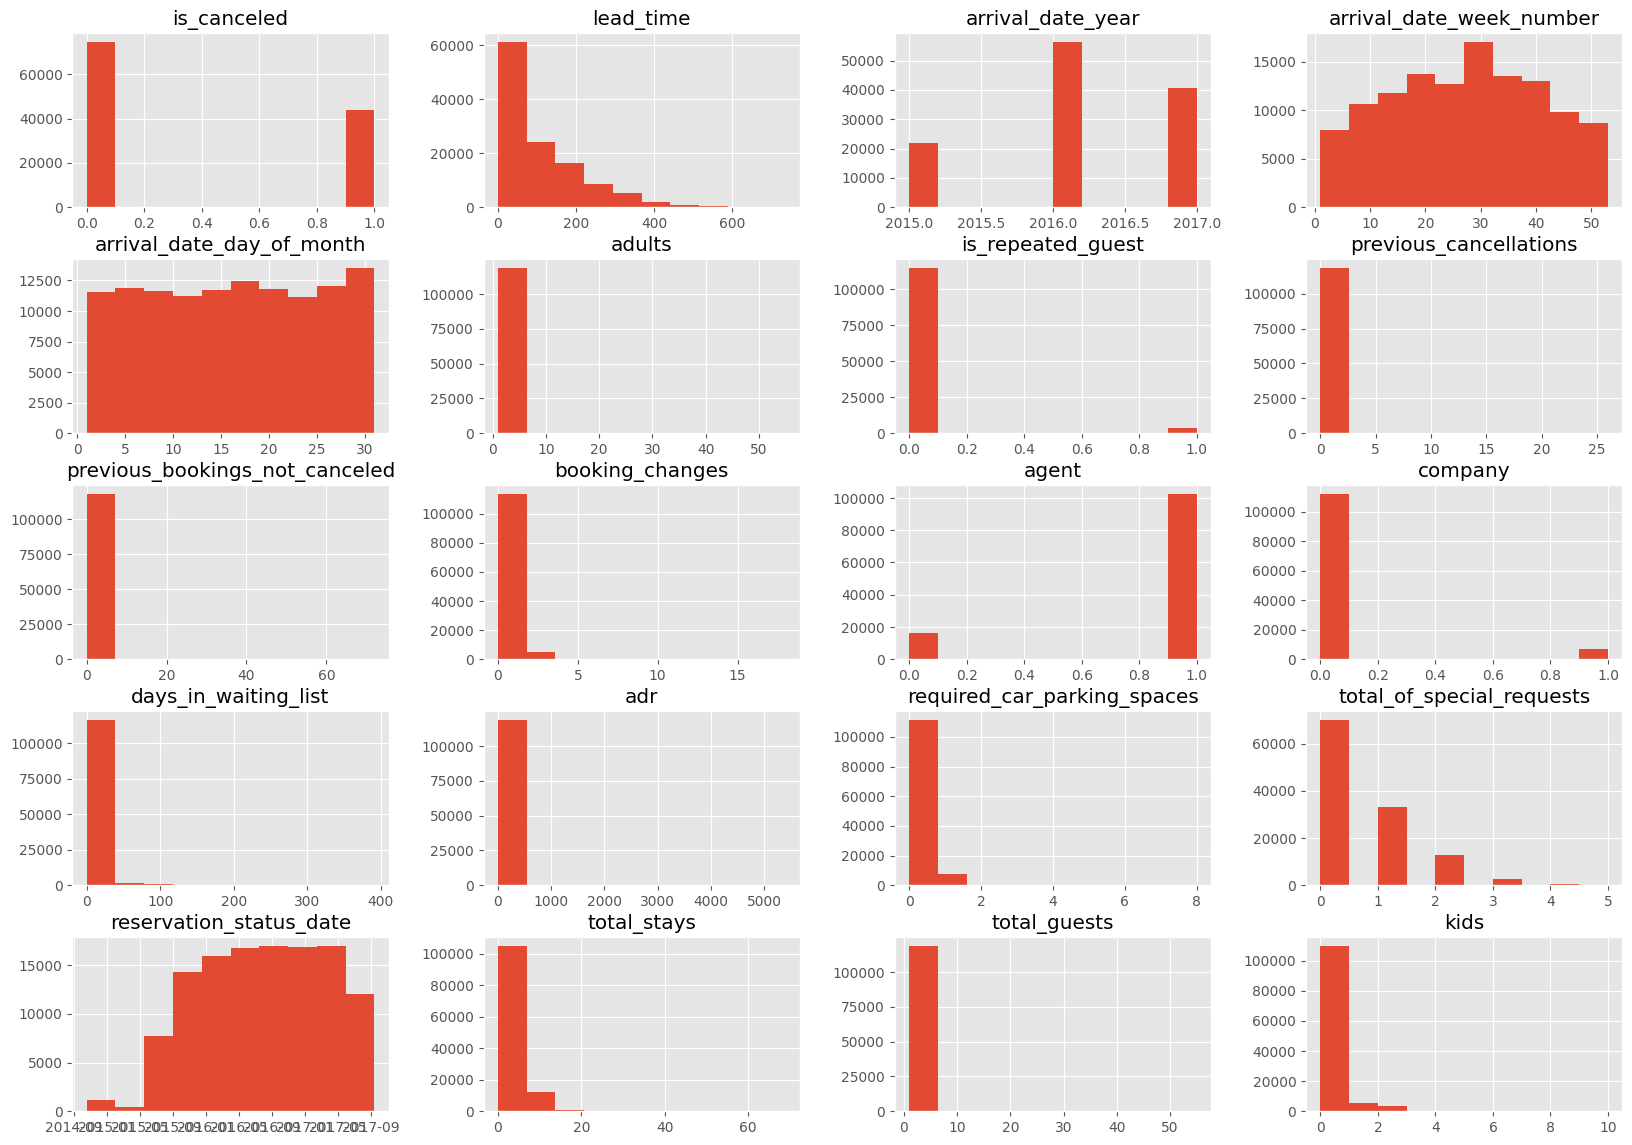

In [ ]:
df.hist(figsize=(20,14))
plt.show()

**BOXPLOT**

**Una gráfica de caja es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números (“mínimo”, primer cuartil (Q1), mediana, tercer cuartil (Q3) y “máximo”). ... También puede indicarle si sus datos son simétricos, qué tan estrechamente están agrupados sus datos y si sus datos están sesgados.**

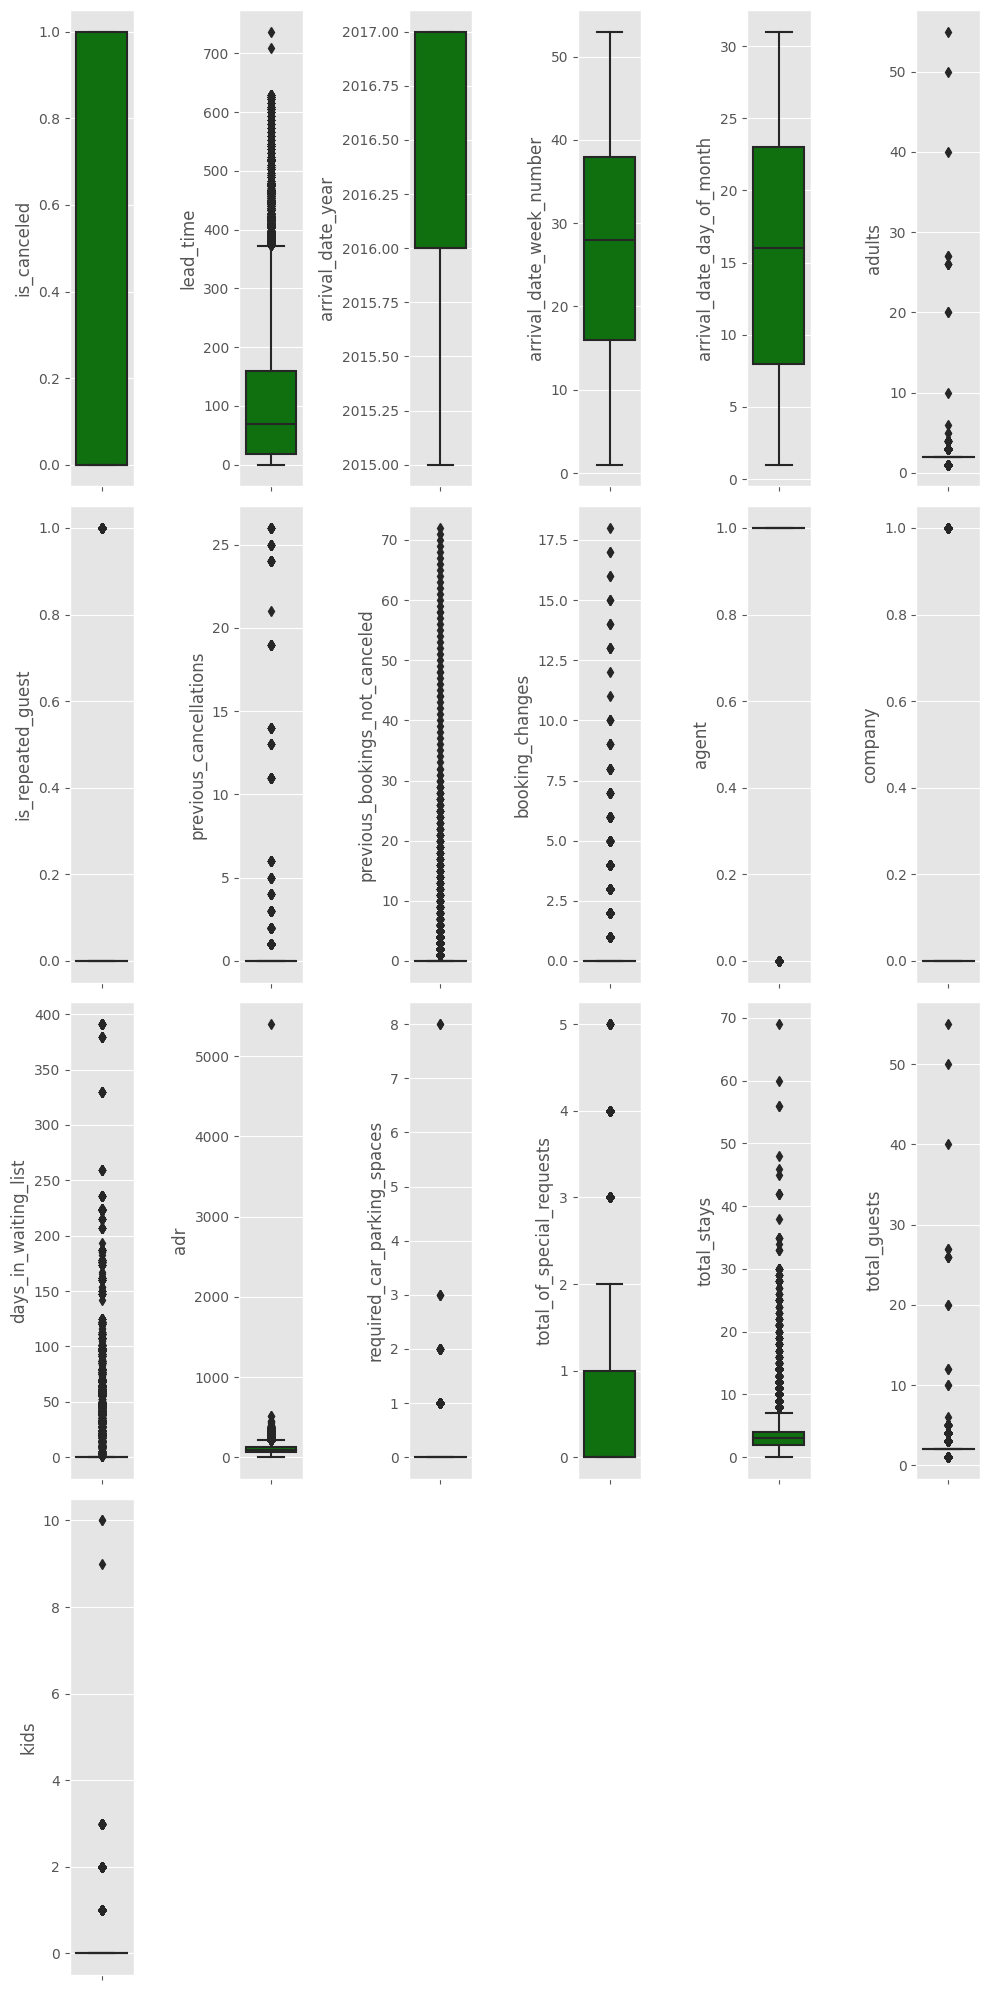

In [ ]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerica)):
    plt.subplot(4, int(len(numerica)/3), i+1)
    sns.boxplot(y=df[numerica[i]], color='g', orient='v')
    plt.tight_layout()

Al visualizar diagrama de caja, lo más importante que debemos prestar atención es la presencia de valores atípicos:
* La mayoría de las columnas numéricas todavía tienen valores atípicos. Pero parece que estos valores atípicos pueden proporcionar mucha información útil, por lo que no estamos haciendo una limpieza de datos atípicos, sino ingeniería de características o creando nuevas columnas y, con suerte, podemos extraer más información al hacerlo.
* El valor atípico que se eliminará está en la columna `adr` porque parece tener un valor muy diferente
* A partir del diagrama de caja, se puede ver que la mayoría de las columnas tienen una distribución *sesgada*, excepto las columnas `fecha_llegada_día_del_mes`, `fecha_llegada_número_semana`

#### Gráfico de Distribución

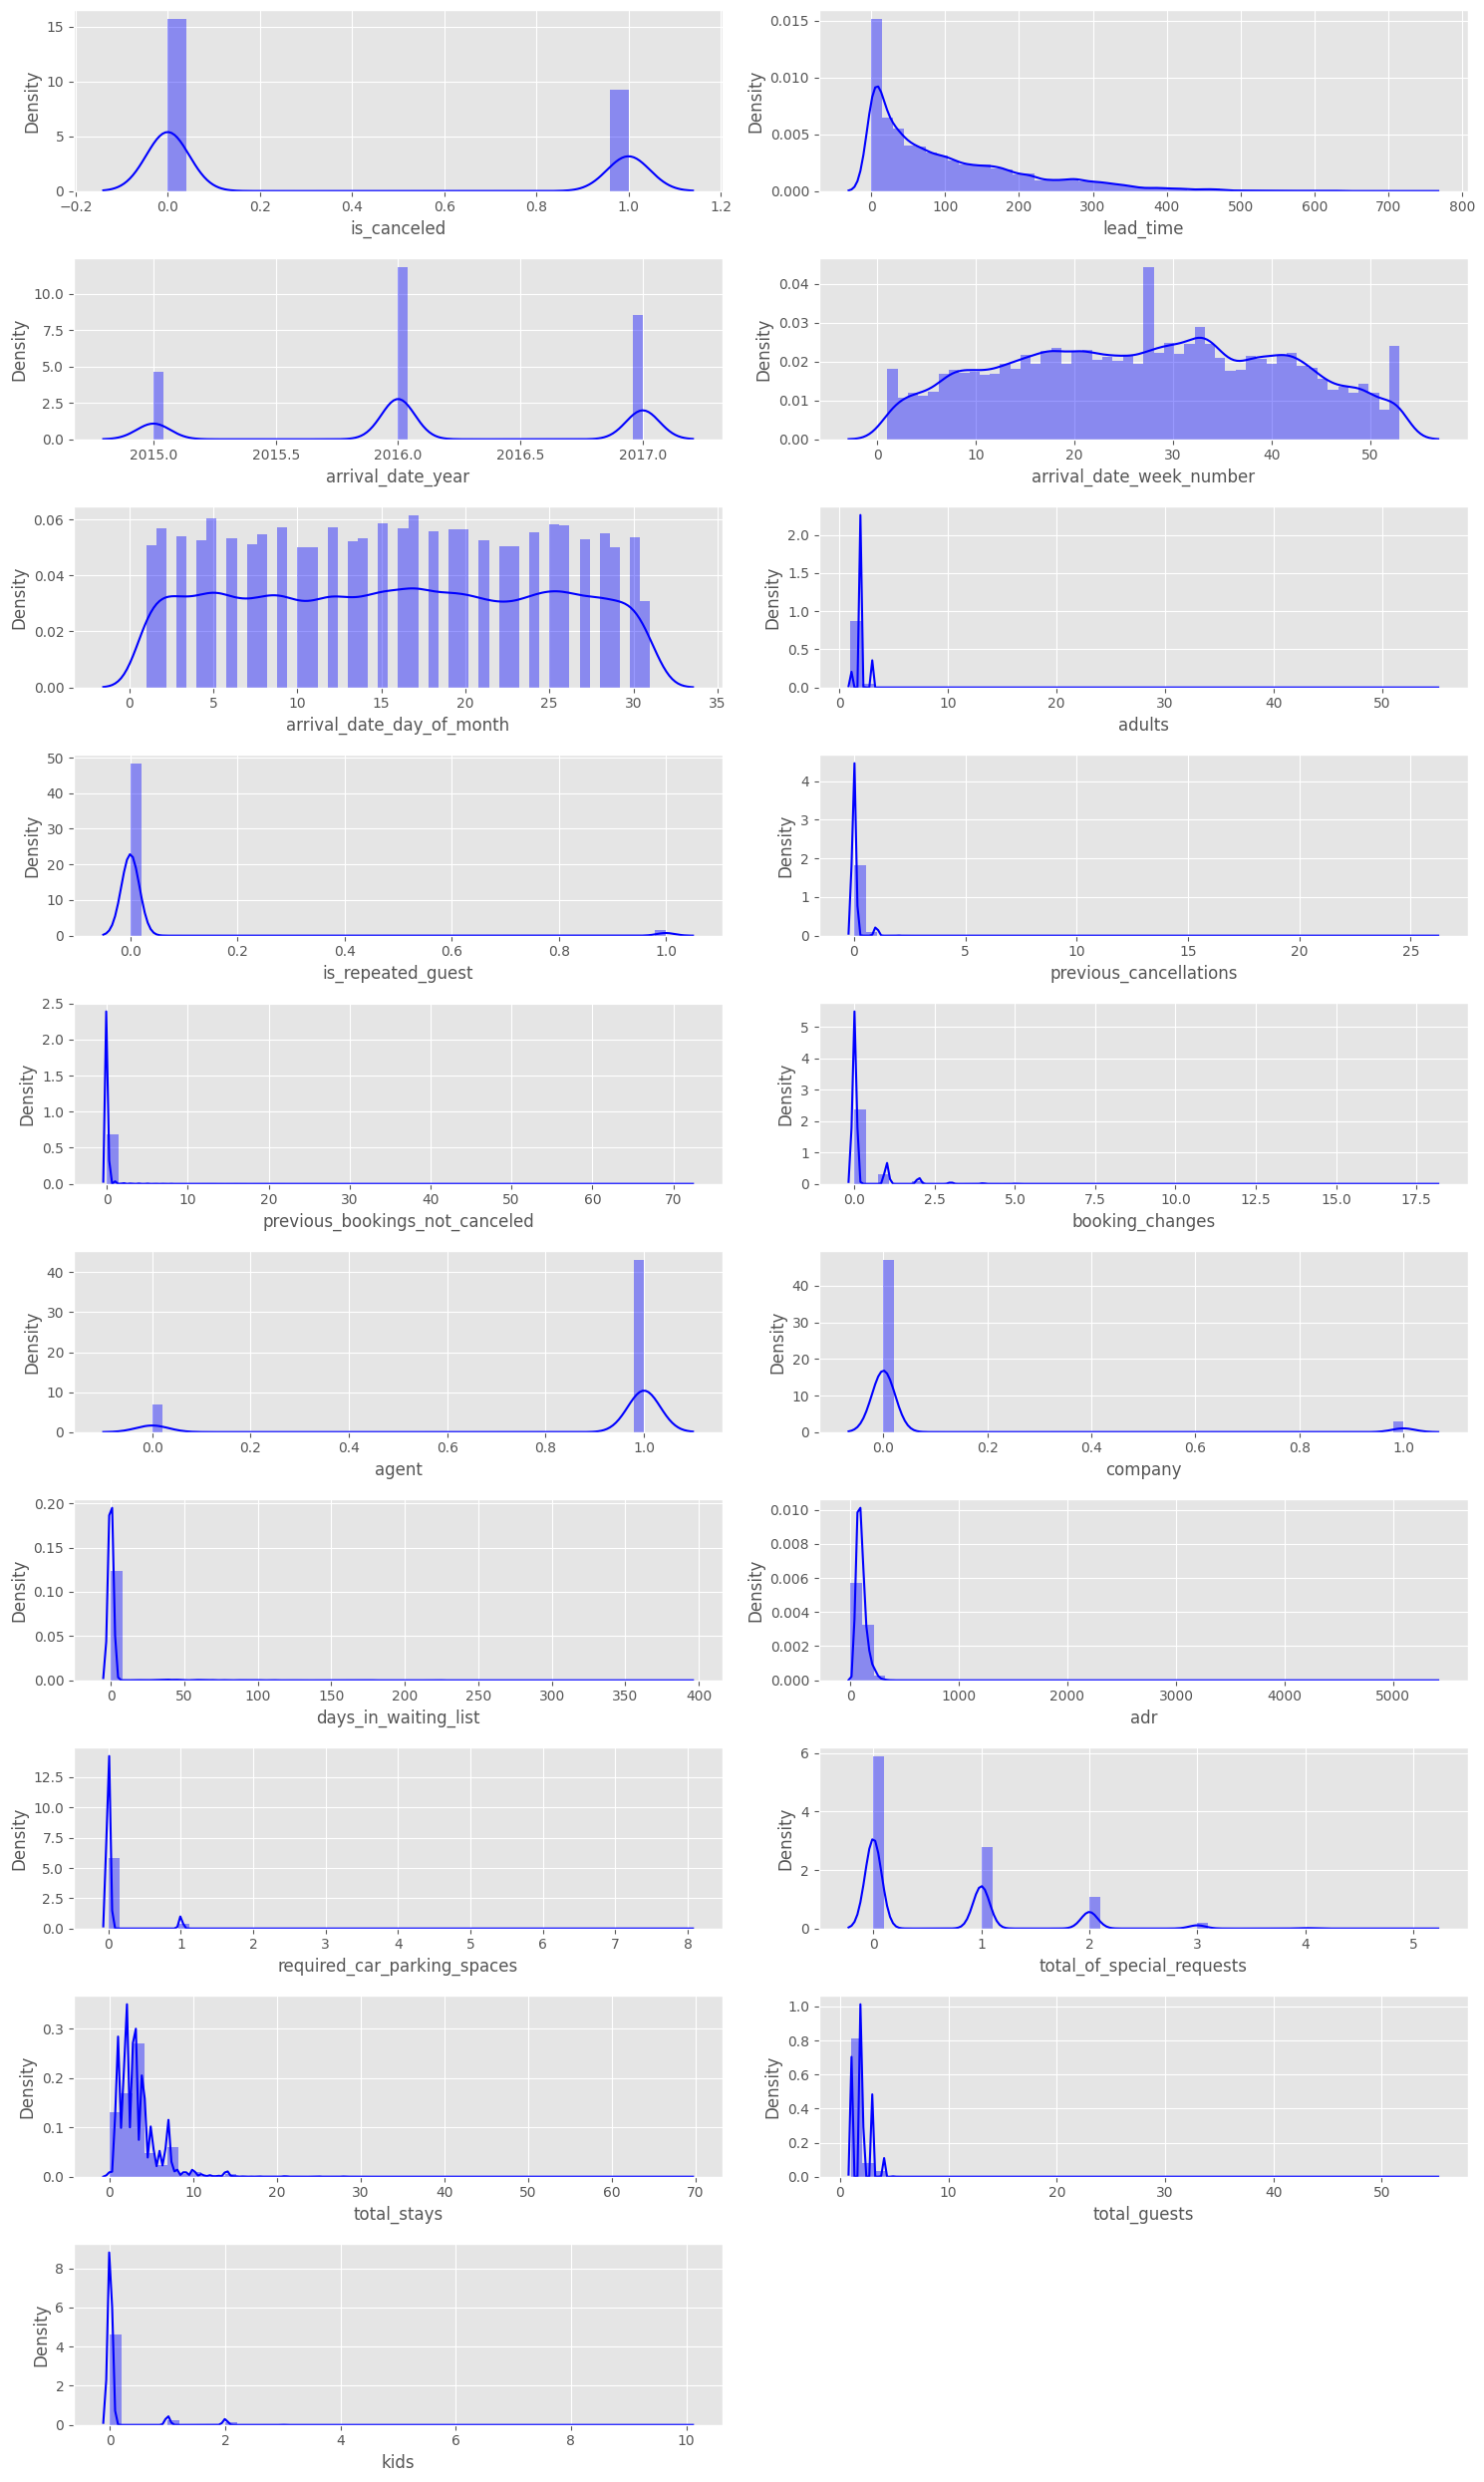

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerica)):
    plt.subplot(10, int(len(numerica)/9), i+1)
    sns.distplot(df[numerica[i]], color="blue")
    plt.tight_layout()

Para el *gráfico de distribución*, lo principal a tener en cuenta es la forma de la distribución:
* Como sospechábamos en el *diagrama de caja*, la mayoría de las columnas tienen una distribución *sesgada*
* Significa que existe la posibilidad de que tengamos que hacer algo con esas columnas más adelante

In [ ]:
categorica

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'guest_location']

In [ ]:
#df.info()

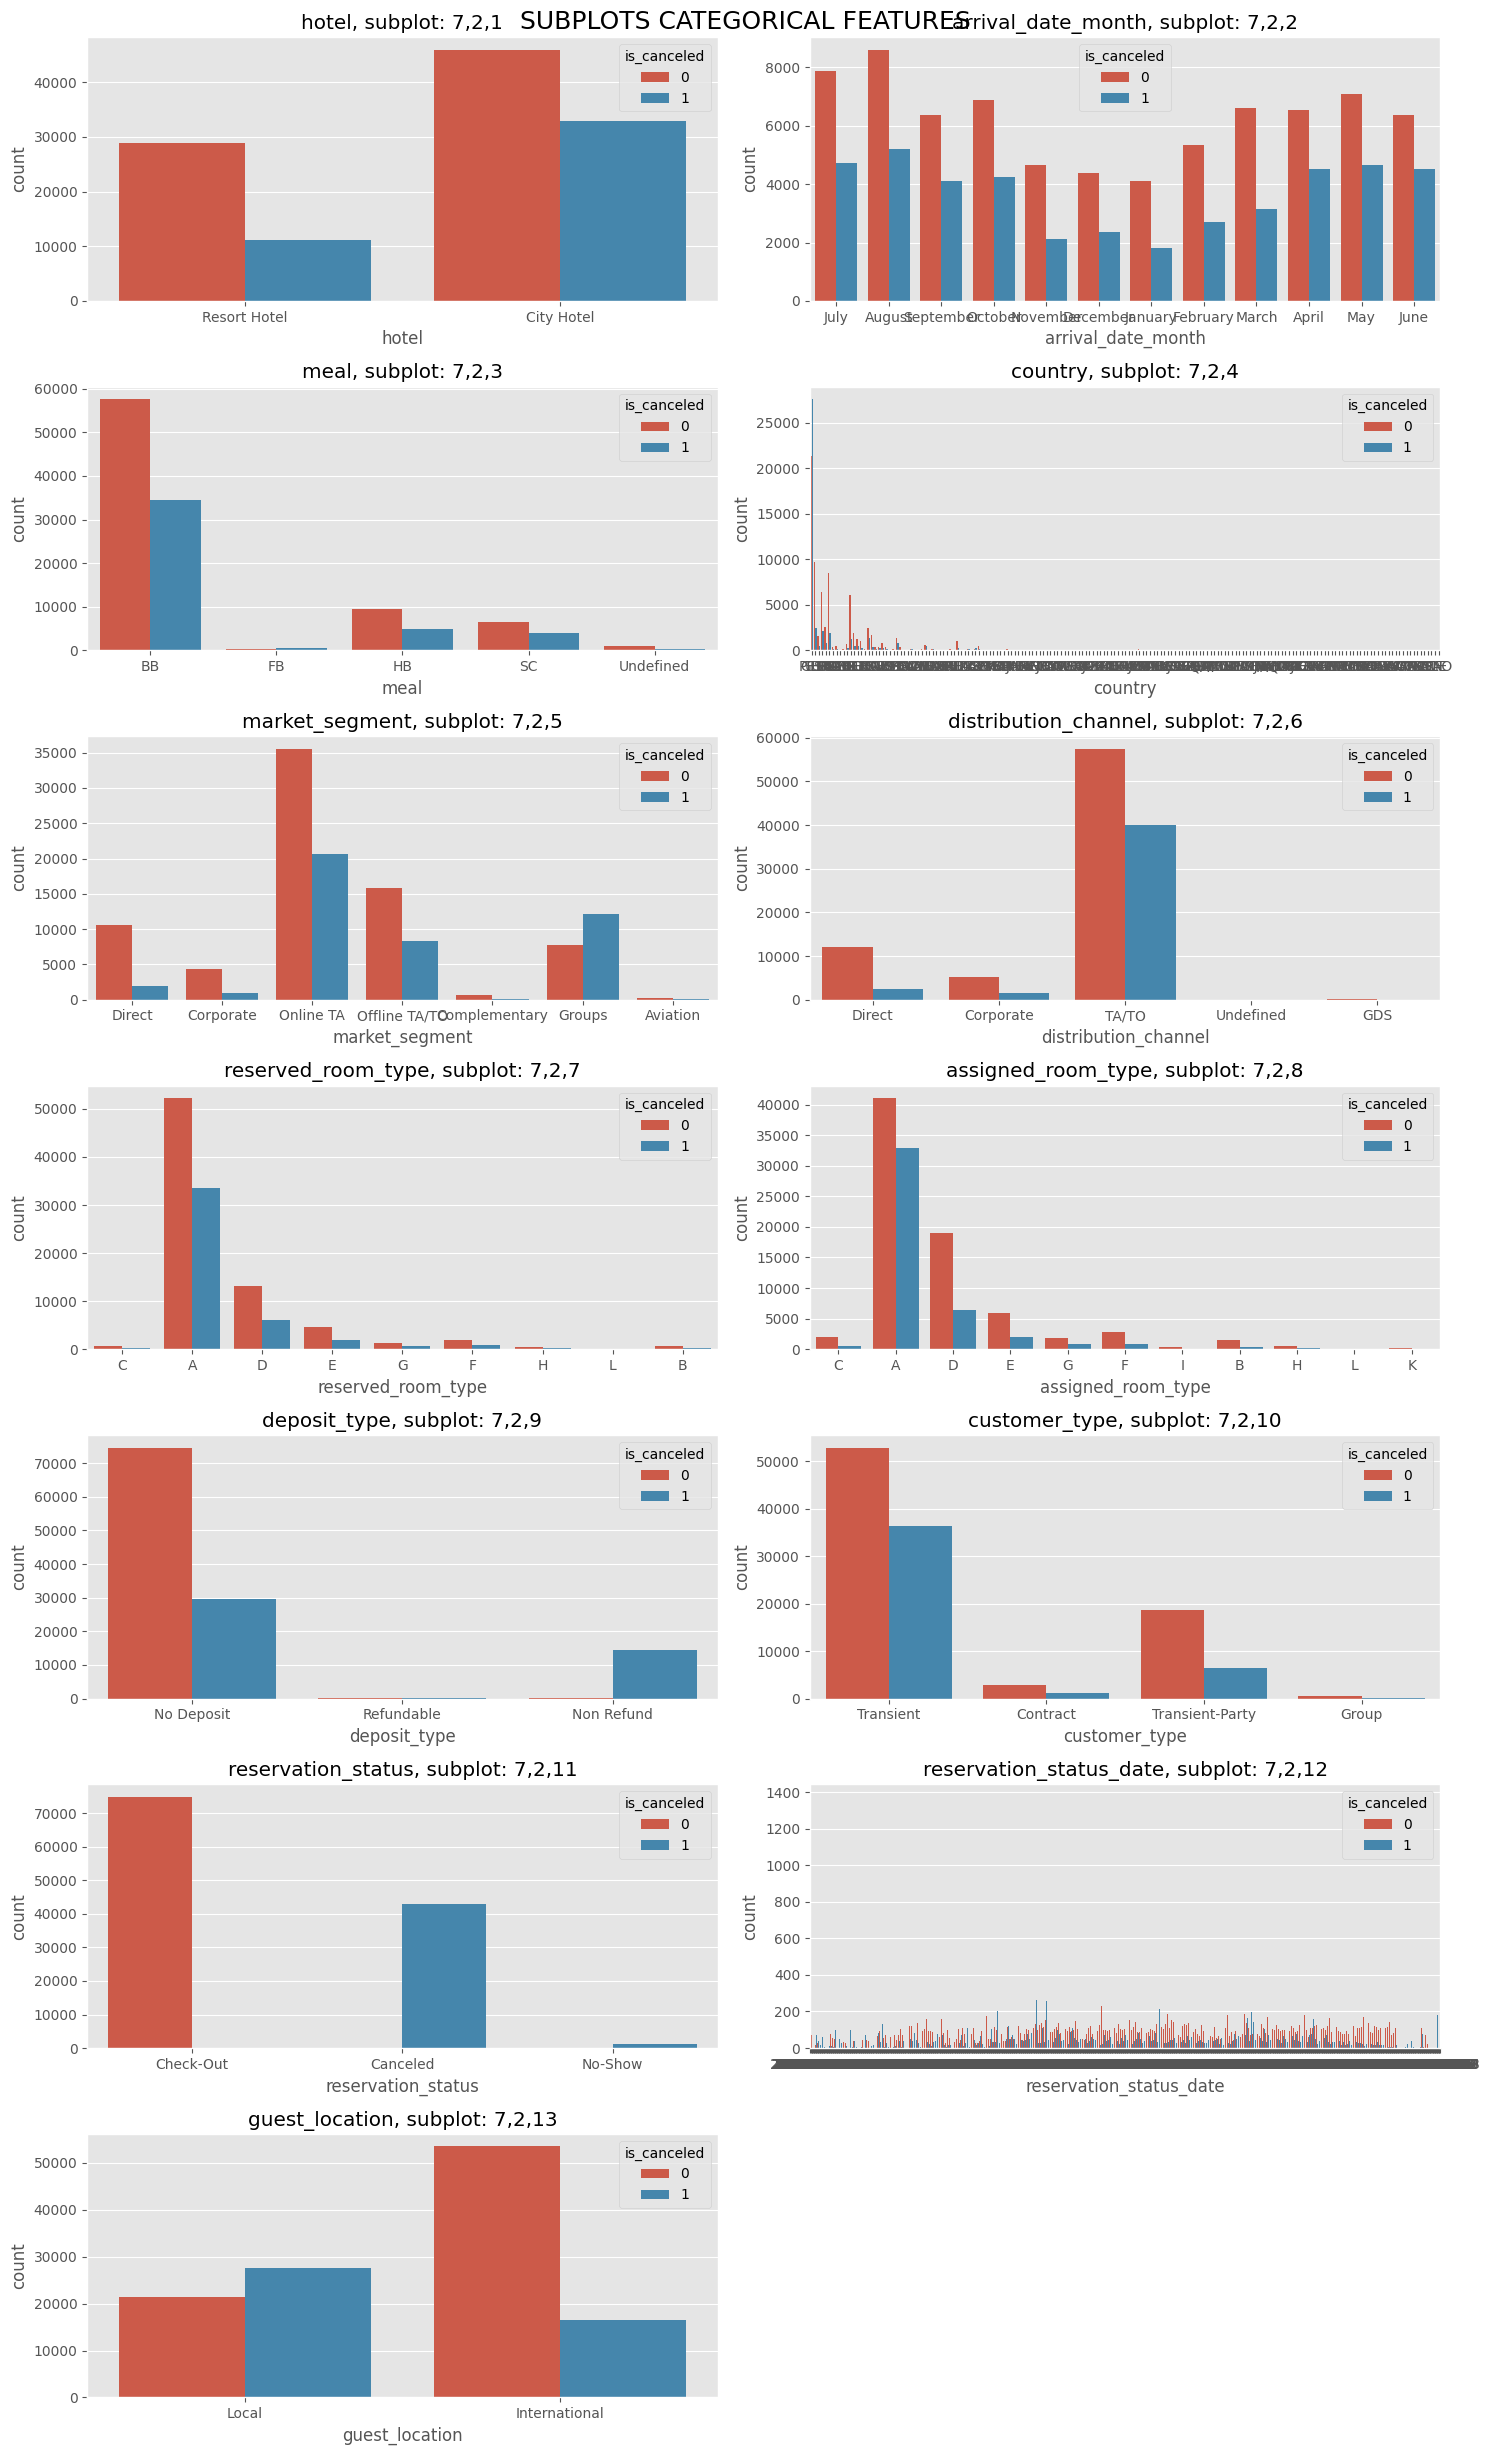

In [ ]:

#  Categorical Data
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (15,25))
plt.suptitle("SUBPLOTS CATEGORICAL FEATURES", fontsize = 18)

for i in categorica:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = df, x = i, hue = 'is_canceled')
    c = c + 1

plt.tight_layout()
plt.show()

Finalmente, veamos el *gráfico de conteo* para cada columna categórica:
* De acuerdo con las observaciones anteriores, la mayoría de los datos son *Hotel de Ciudad*
* La mayoría de los clientes hacen reservas de hotel para los meses de *julio* y *agosto* (verano)
* La mayoría de los clientes son de clientes internacionales
* La mayoría de los clientes eligen reservar en hoteles con el tipo *Sin Depósito*
* La mayoría de los segmentos de mercado o canales de distribución provienen de Agentes de Viajes
* La mayoría de los tipos de habitación seleccionados son *A*
* La columna `país` tiene muchos valores únicos
* En la columna `reservation_status`, se puede ver que la proporción de datos está equilibrada entre reservas canceladas
* La columna `reservation_status_date` tiene muchos valores porque son datos de fecha
* Para otras columnas parece dominado por ciertos valores

### Análisis Multivariado

El análisis bivariado es una de las formas más simples de análisis cuantitativo (estadístico). Implica el análisis de dos variables (a menudo denotadas como X, Y), con el fin de determinar la relación empírica entre ellas.

El análisis bivariado puede ser útil para probar hipótesis simples de asociación. El análisis bivariado puede ayudar a determinar hasta qué punto se vuelve más fácil conocer y predecir un valor para una variable (posiblemente una variable dependiente)si conocemos el valor de la otra variable (posiblemente la variable independiente)(ver también correlación y regresión lineal simple).

El análisis bivariado se puede contrastar con el análisis univariado en el que solo se analiza una variable. Al igual que el análisis univariado, el análisis bivariado puede ser descriptivo o inferencial. Es el análisis de la relación entre las dos variables. El análisis bivariado es un caso especial simple (dos variables) de análisis multivariante (donde se examinan simultáneamente múltiples relaciones entre múltiples variables).

#### Matriz de Correlación

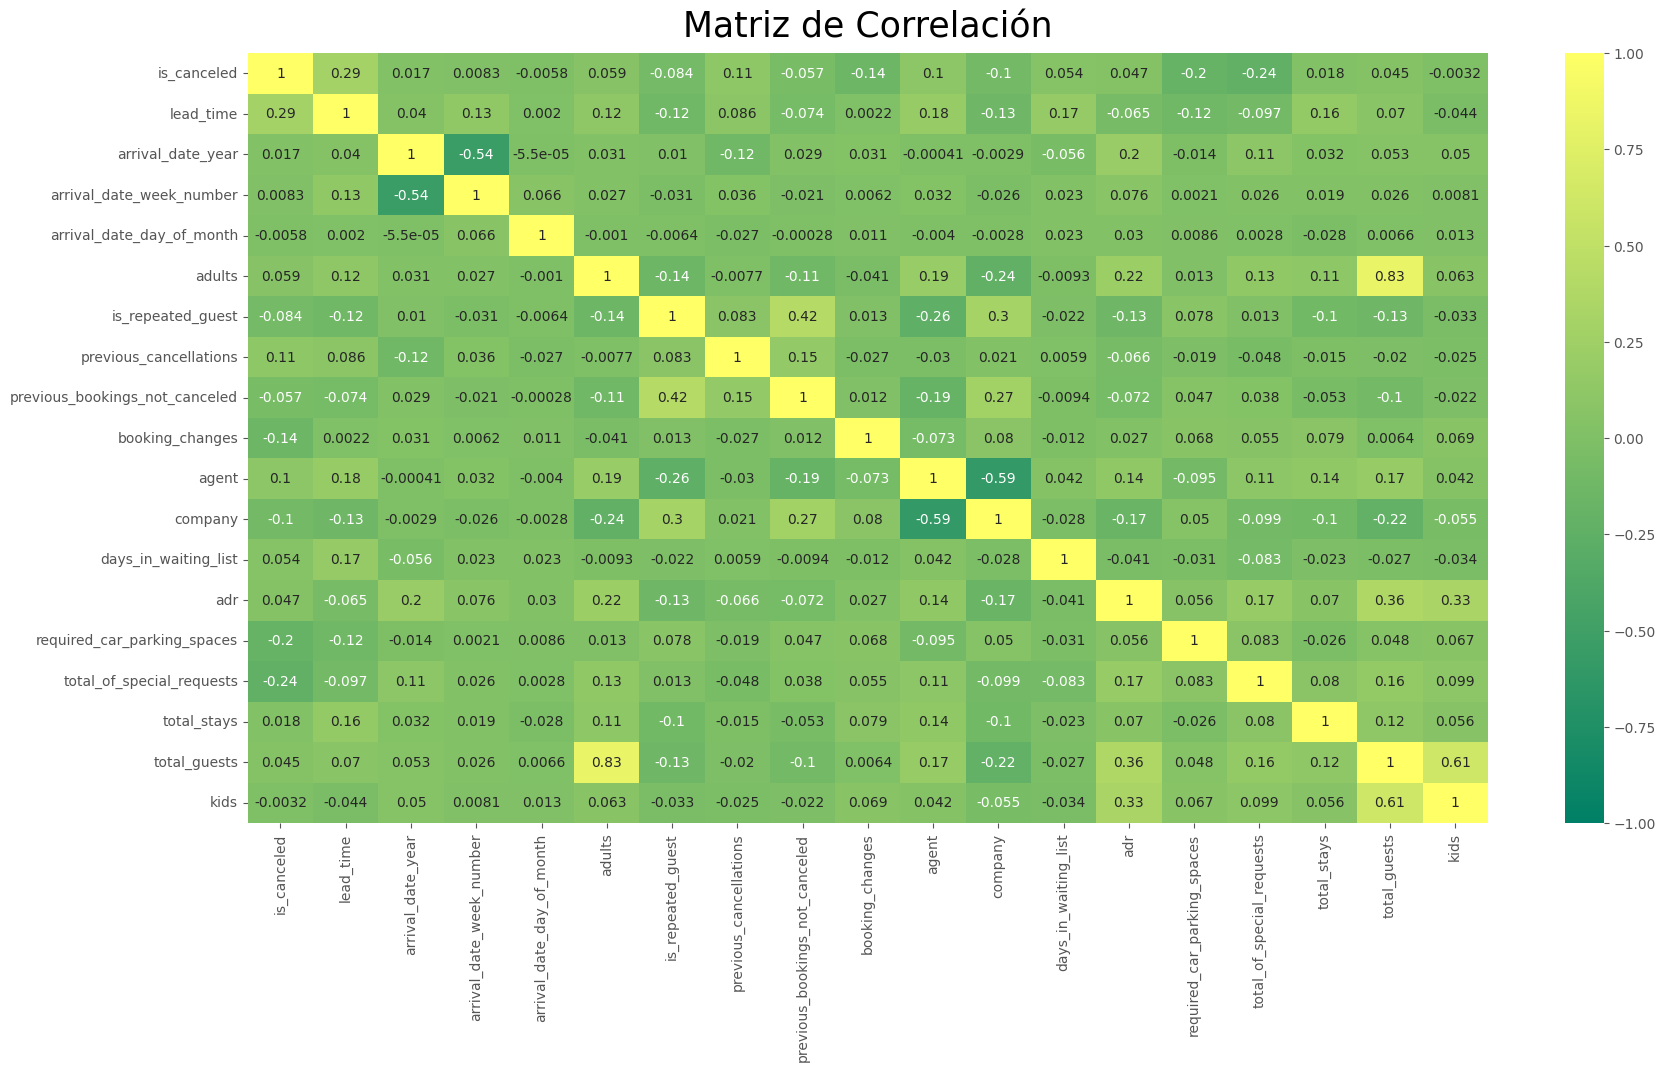

In [ ]:
# Matriz de correlación ( corregir)
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(),cmap='summer',annot=True,vmin=-1, vmax=1)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);  

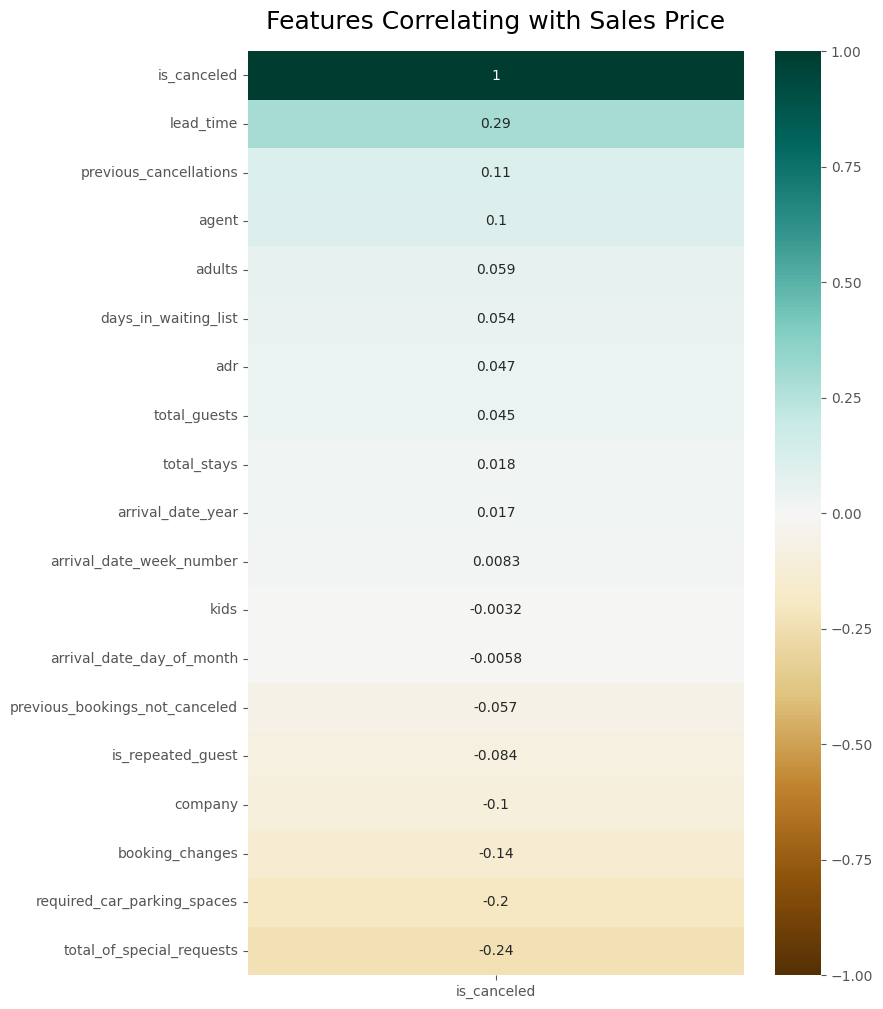

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

Del *mapa de calor de la asociación* anterior, se puede ver que:

* Nuestro objetivo `is_cancelled` tiene una débil correlación positiva con `arrival_date_week_number`, `kids` y `arrival_date_day_of_month`
* Entonces, el objetivo `is_cancelled` claramente tiene una fuerte correlación positiva con `lead_time`, porque de hecho el tiempo de la reserva indica si la reserva del hotel está cancelada o no.
* La columna `total_guests` tiene una fuerte correlación positiva con `adultos` y `niños` porque es una columna obtenida a partir de los resultados del cálculo de las dos columnas.
* Las columnas `previous_cancellations`, `agent` y `adult` tienen una fuerte correlación positiva, posiblemente redundante.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118982 entries, 0 to 118981
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118982 non-null  object 
 1   is_canceled                     118982 non-null  int64  
 2   lead_time                       118982 non-null  int64  
 3   arrival_date_year               118982 non-null  int64  
 4   arrival_date_month              118982 non-null  object 
 5   arrival_date_week_number        118982 non-null  int64  
 6   arrival_date_day_of_month       118982 non-null  int64  
 7   adults                          118982 non-null  int64  
 8   meal                            118982 non-null  object 
 9   country                         118982 non-null  object 
 10  market_segment                  118982 non-null  object 
 11  distribution_channel            118982 non-null  object 
 12  is_repeated_gues

#### EDA Conclusion

Algunas de las cosas que encontramos de este conjunto de datos EDA son:
* Los datos parecen válidos y no hay defectos.
* La mayoría de las columnas numéricas tienen una distribución sesgada, esto debe recordarse si queremos hacer algo o usar un modelo que requiera asumir una distribución normal.
* Para eliminar los valores atípicos, solo se deben eliminar los valores atípicos en la columna `adr`. Para la mayoría de las otras columnas que tienen valores atípicos, no se eliminan porque pueden proporcionar mucha información útil, pero se llevará a cabo la ingeniería de características o se creará una nueva columna que se espera que extraiga más información al hacerlo.
* Nuestro objetivo `hotel` tiene una débil correlación positiva con `deposit_type`, `lead_time` y `guest_location` o `country`
* Hay características que tienen una fuerte correlación, una de ellas será utilizada

## Preprocesamiento de datos

### Removiendo Outlier

Removiendo outlier para `adr` con value > 5000

In [ ]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

### Reformateando Feature

Cambie el valor de `previous_cancellations` a 0 y 1.<br>
* 0 -> sin cancelaciones previas
* 1 -> cancelaciones anteriores > 0

In [ ]:
df['previous_cancellations'] = df['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df['previous_cancellations'].value_counts()

0    112504
1      6477
Name: previous_cancellations, dtype: int64

Cambiando los valores para  `booking_changes` a 0 y 1.<br>

* 0 -> no booking changes
* 1 -> booking changes > 0

In [ ]:
df['booking_changes'] = df['booking_changes'].apply(lambda x: 0 if x == 0 else 1)
df['booking_changes'].value_counts()

0    101062
1     17919
Name: booking_changes, dtype: int64

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

## Class imbalance 

In [ ]:
df['is_canceled'].value_counts()

0    74871
1    44110
Name: is_canceled, dtype: int64

In [ ]:
#Corregir 

#plt.figure(figsize=(5, 6))

#cancel_ax = sns.countplot(df['is_canceled'].astype(np.object)) #data["col_name"].astype(numpy.object)

#for p in cancel_ax.patches:
#    cancel_ax.annotate(format(p.get_height(), '.0f'), 
#                   (p.get_x() + p.get_width() / 2., p.get_height()), 
#                   ha = 'center', va = 'center', 
#                   xytext = (0, 9), 
#                   textcoords = 'offset points')

#plt.show()

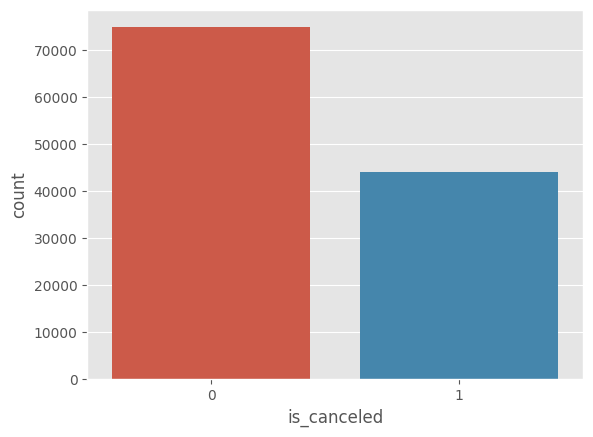

In [ ]:
sns.countplot(x ='is_canceled', data = df)
plt.show()

En proporción, la comparación entre clases sigue siendo equilibrada. Por lo tanto, no hay necesidad de hacer submuestreo o sobremuestreo

## Análisis multivariante con la variable objetivo

### Tasa de cancelación

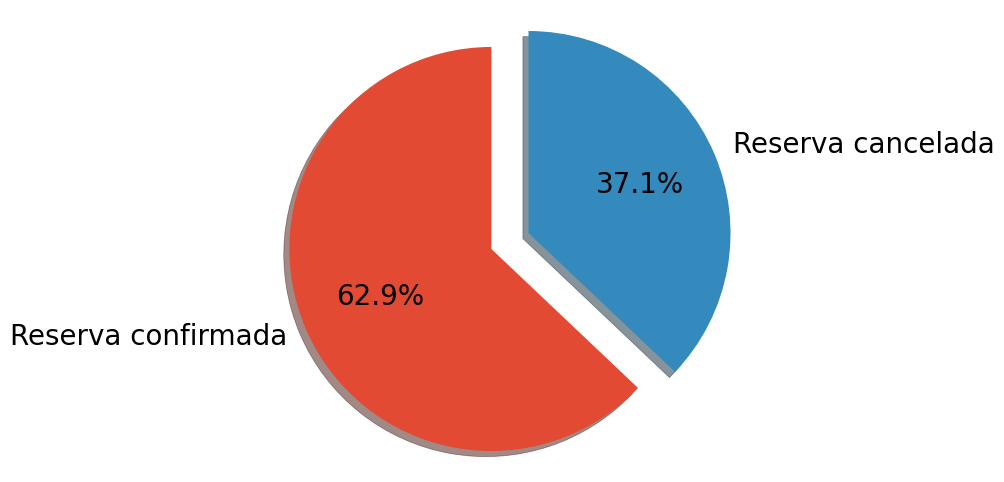

In [ ]:
labels = ['Reserva confirmada', 'Reserva cancelada']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Distribución de ADR

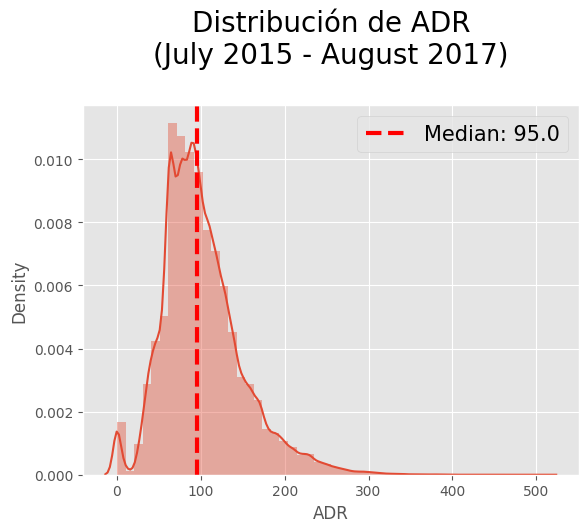

In [ ]:
adr_median = df['adr'].median()
sns.distplot(df['adr'])
plt.title('Distribución de ADR\n(July 2015 - August 2017)', fontsize=20, pad=30)
plt.axvline(adr_median, color='red', linestyle='dashed', linewidth=3, label='Median: ' + str(round(adr_median, 2))) 
plt.xlabel('ADR', fontsize=12)
plt.legend(fontsize=15)
plt.show()

### Plazo de entrega  y hotel

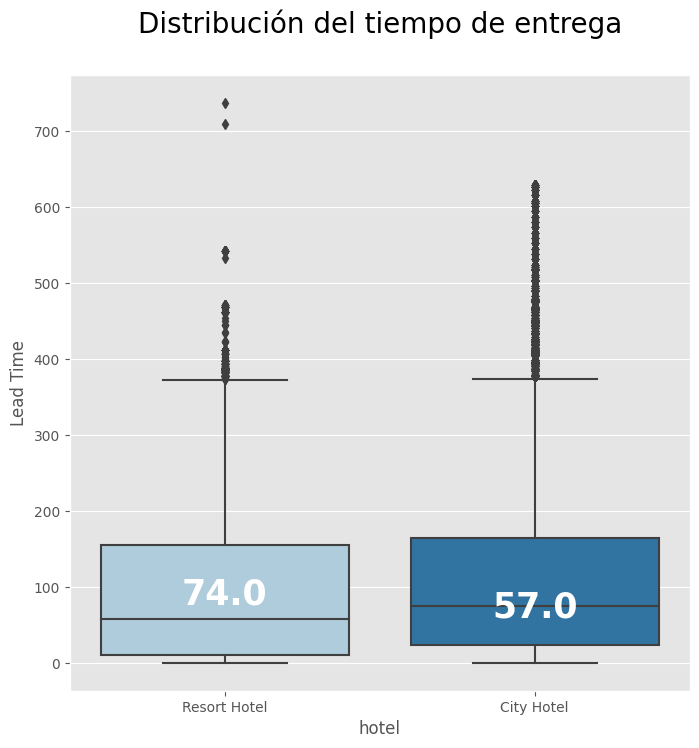

In [ ]:
plt.figure(figsize=(8, 8))
lead_time_ax = sns.boxplot(x="hotel", y='lead_time', data=df, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('hotel', fontsize=12)
plt.title('Distribución del tiempo de entrega', fontsize=20, pad=30)
medians = df.groupby(['hotel'])['lead_time'].median()
vertical_offset = df['lead_time'].median() * 0.05
for xtick in lead_time_ax.get_xticks():
    lead_time_ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',fontsize=25,color='w',weight='semibold')

plt.show()

**Conclusiones clave:**

* Cuanto mayor sea el tiempo de espera, mayor será la posibilidad de que el cliente cancele la reserva de hotel

* Tiene sentido que si aumenta el número de días entre el momento en que se realiza la reserva y la fecha estimada de llegada, los clientes tienen más tiempo para cancelar reservas y más tiempo para circunstancias imprevistas que podrían descarrilar los planes de viaje.

### Plazo de entrega (mes) y cancelación

In [ ]:
df_lead_time = df
df_lead_time['lead_time_month'] = df_lead_time['lead_time'] // 30
df_lead_time = df_lead_time.groupby(['lead_time_month','is_canceled']).agg({'hotel':'count'}).reset_index()
df_lead_time = df_lead_time.rename(columns={'hotel':'total'})
df_lead_time['total_guests'] = df_lead_time.groupby(['lead_time_month'])['total'].transform('sum')

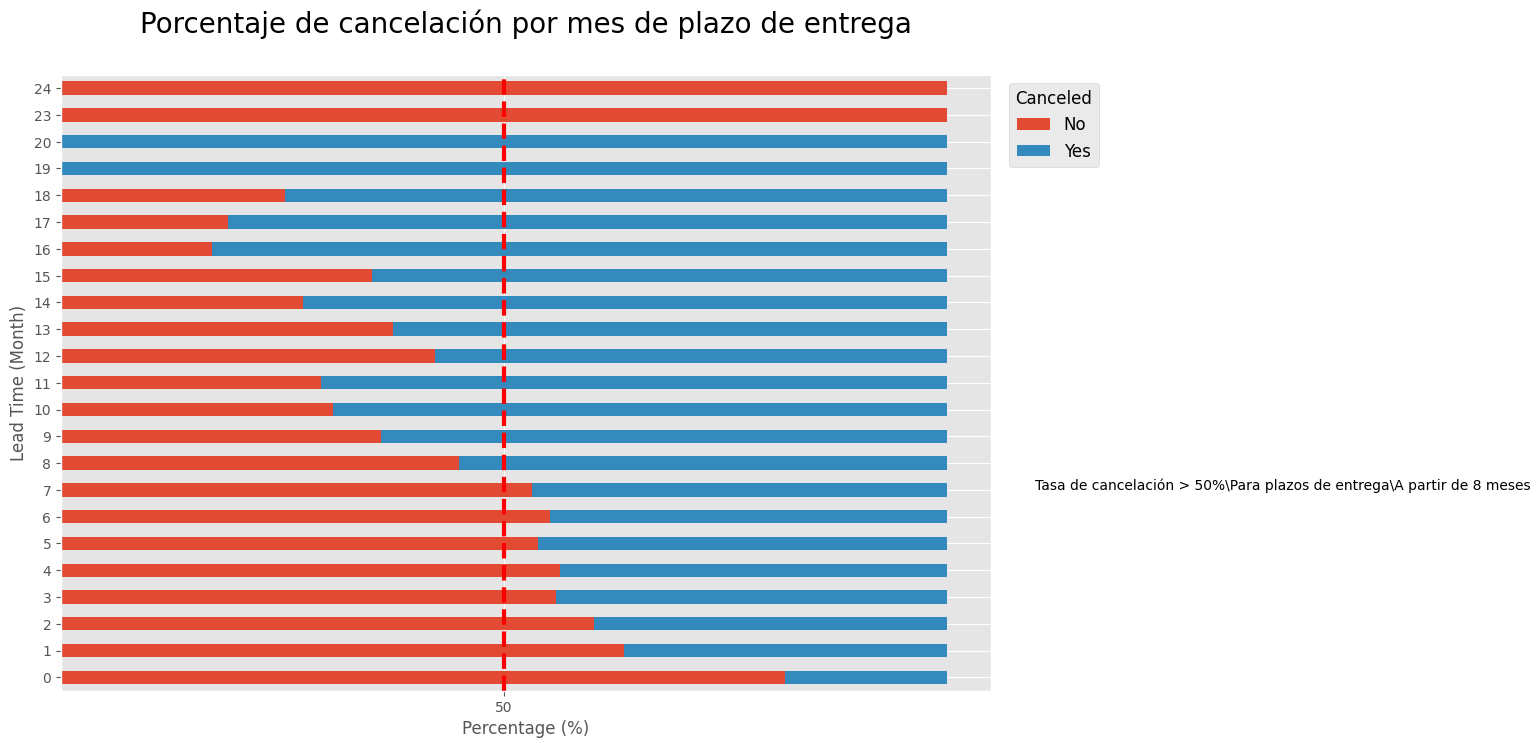

In [ ]:
df_lead_time_plot = df_lead_time.copy()
df_lead_time_plot['cancel_percentage'] = (df_lead_time_plot['total'] / df_lead_time_plot['total_guests']) * 100
df_lead_time_plot = df_lead_time_plot.sort_values('cancel_percentage', ascending=False)

df_lead_time_plot = df_lead_time_plot.pivot_table(index='lead_time_month', columns='is_canceled', values='cancel_percentage')

lead_time_ax = df_lead_time_plot.plot(kind='barh', stacked=True, figsize=(12,8))
plt.legend(bbox_to_anchor=(1.01, 1), title='Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
plt.title('Porcentaje de cancelación por mes de plazo de entrega', fontsize=20, pad=30)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Lead Time (Month)', fontsize=12)
plt.axvline(50, color='red', linestyle='dashed', linewidth=3, label='50%')
#plt.annotate(s='',xy=(100,8), xytext=(110,8), arrowprops=dict(arrowstyle='<-', color='black'))
plt.text(110, 7, 'Tasa de cancelación > 50%\Para plazos de entrega\A partir de 8 meses', horizontalalignment='left', size='medium', color='black')
lead_time_ax.set_xticks([50])
plt.show()

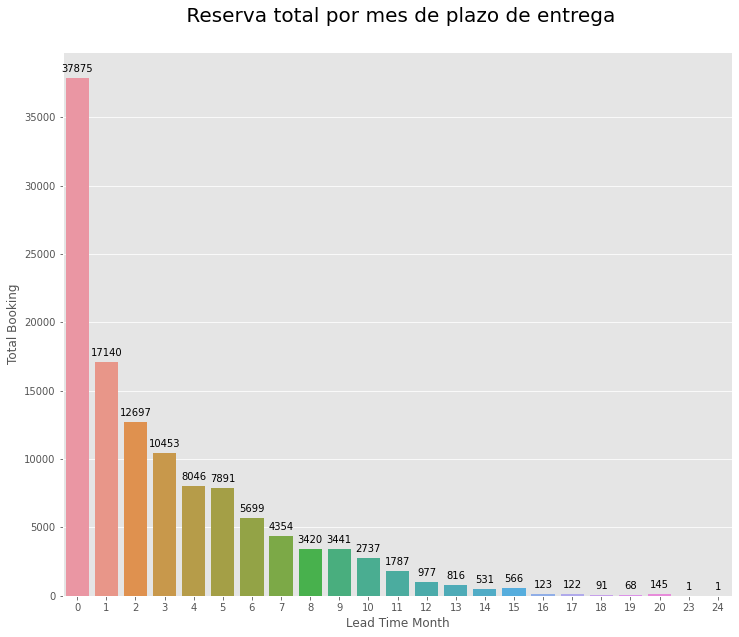

In [ ]:
df_lead_time_pop = df_lead_time.copy()
df_lead_time_pop = df_lead_time_pop.drop_duplicates('lead_time_month', keep='first')
plt.figure(figsize=(12, 10))
lead_time_pop_ax = sns.barplot(df_lead_time_pop['lead_time_month'], df_lead_time_pop['total_guests'])
for p in lead_time_pop_ax.patches:
    lead_time_pop_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize=10)
plt.xlabel('Lead Time Month', fontsize=12)
plt.ylabel('Total Booking', fontsize=12)
plt.title(' Reserva total por mes de plazo de entrega', fontsize=20, pad=30)
plt.show()

**Conclusiones clave:**
* Las reservas de hotel con un plazo de entrega de más de 7 meses tienen más del 50% de posibilidades de cancelación

###  Tipo de Depósito y Cancelación

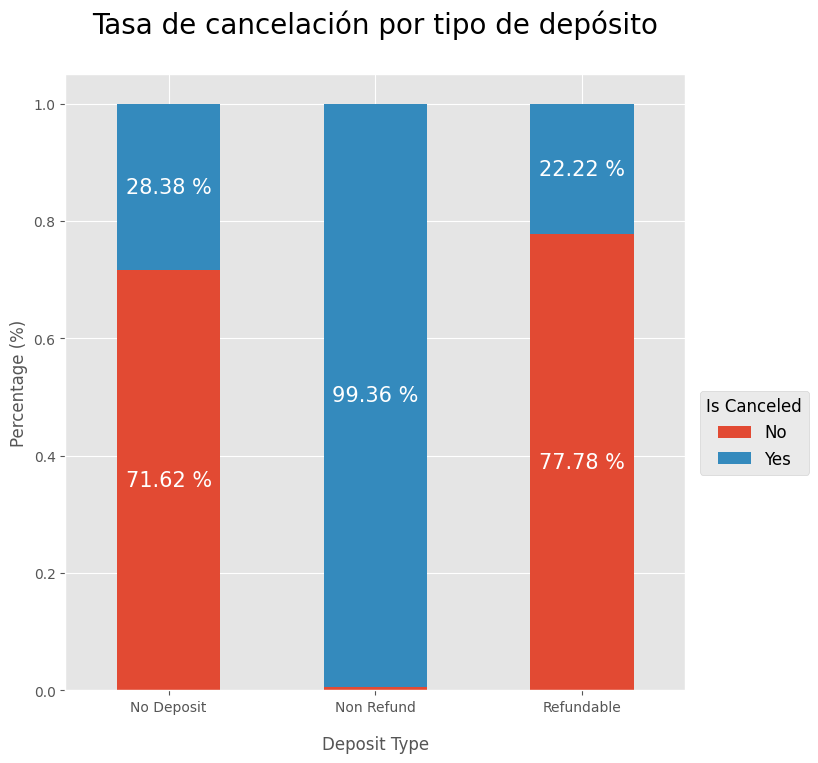

In [ ]:
deposit_ax = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in deposit_ax.patches:
    if j != 2:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      deposit_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
    
plt.title('Tasa de cancelación por tipo de depósito', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

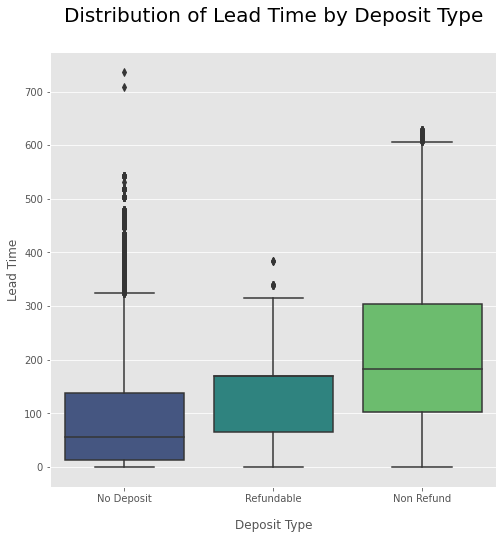

In [ ]:
plt.figure(figsize=(8, 8))
deposit_ax2 = sns.boxplot(x='deposit_type', y='lead_time', data=df, palette='viridis')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.title('Distribution of Lead Time by Deposit Type', fontsize=20, pad=30)
plt.show()

**Conclusiones clave:**

* Las reservas de hotel con tipos de depósito no reembolsables tienen las mayores tasas de cancelación, alcanzando el 99 % en comparación con otros tipos de depósito.

* Una de las razones es que las reservas de hotel con tipos de depósito no reembolsable tienen el tiempo medio de espera más alto.

### Cancelaciones Previas y Cancelación

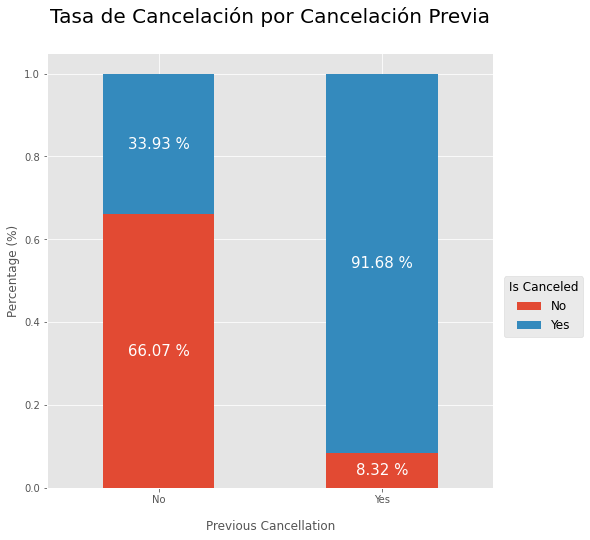

In [ ]:
previous_ax = pd.crosstab(df['previous_cancellations'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in previous_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    previous_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de Cancelación por Cancelación Previa', fontsize=20, pad=30)   
previous_ax.set_xticklabels(['No','Yes'], rotation=360) 
plt.xlabel('Previous Cancellation', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**
* Los clientes que han cancelado reservas de hotel anteriores tienen un 92% de probabilidades de cancelar nuevamente

### Tipo de Hotel por cancelación

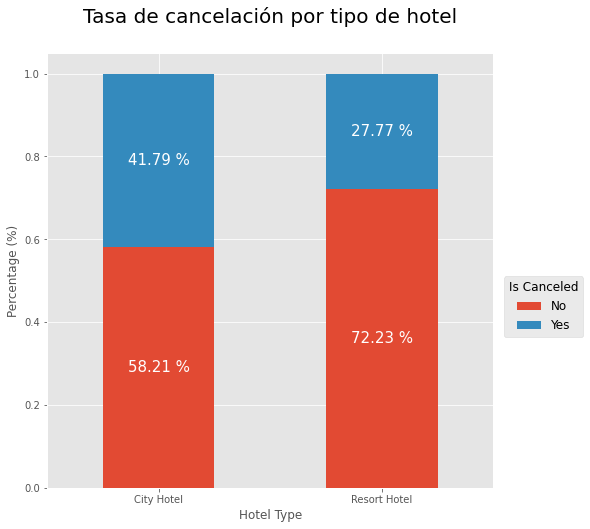

In [ ]:
hotel_ax = pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de cancelación por tipo de hotel', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

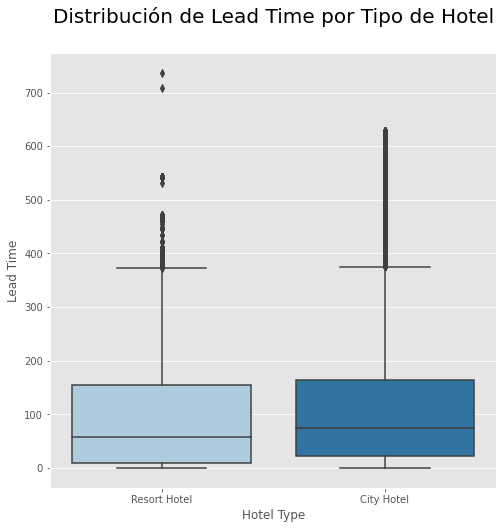

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='hotel', y='lead_time', data=df, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Hotel Type', fontsize=12)
plt.title('Distribución de Lead Time por Tipo de Hotel', fontsize=20, pad=30)
plt.show()

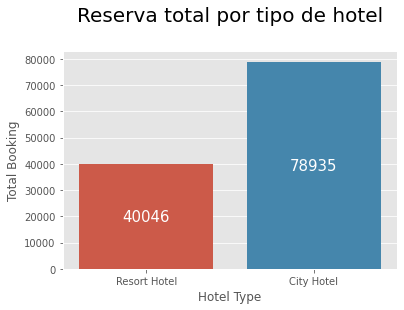

In [ ]:
hotel_ax2 = sns.countplot(df['hotel'])
for p in hotel_ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax2.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=15)

plt.title('Reserva total por tipo de hotel', fontsize=20, pad=30)    
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Total Booking', fontsize=12)
plt.show()

**Conclusiones clave:**

* Los hoteles de ciudad tienen una tasa de cancelación más alta que los hoteles turísticos

* Visto desde otro punto de vista:
    - Los hoteles de ciudad tienen un mayor número de reservas que los hoteles Resort, se puede concluir que a más reservas de hotel, mayor tasa de cancelación
    - El tiempo medio de entrega no se ve muy diferente

### Ubicación del huésped y cancelación

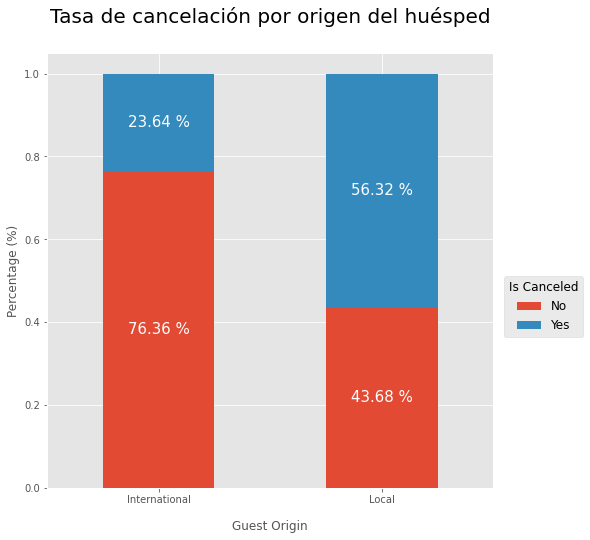

In [ ]:
guest_ax = pd.crosstab(df['guest_location'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in guest_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    guest_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de cancelación por origen del huésped', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

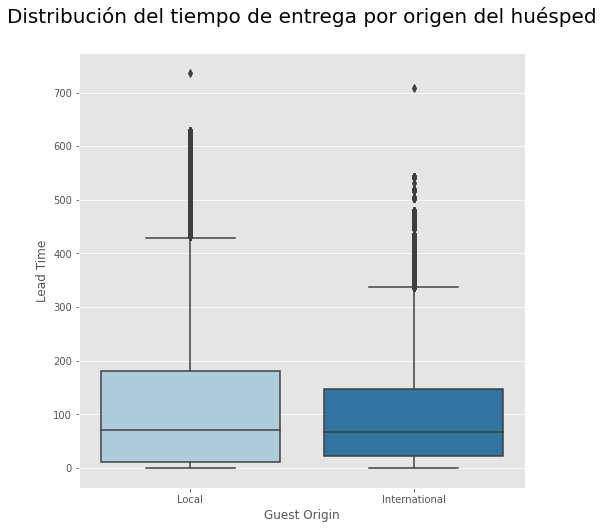

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='guest_location', y='lead_time', data=df, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Guest Origin', fontsize=12)
plt.title('Distribución del tiempo de entrega por origen del huésped', fontsize=20, pad=30)
plt.show()

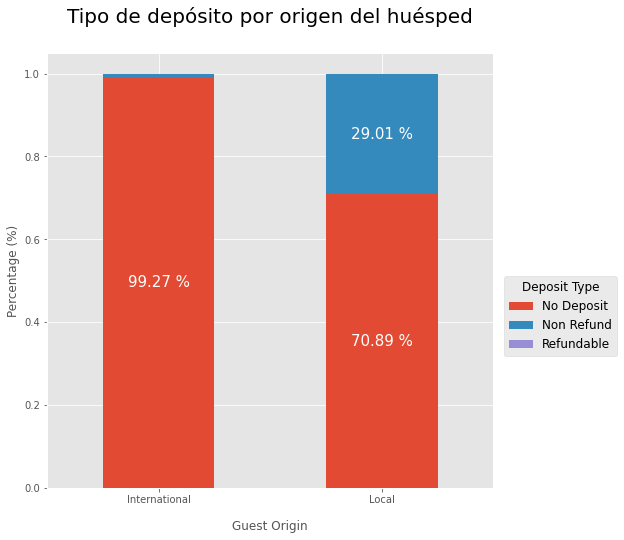

In [ ]:
guest_ax2 = pd.crosstab(df['guest_location'], df['deposit_type'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Deposit Type', fontsize=12, title_fontsize=12)

j = 1
for p in guest_ax2.patches:
    if j == 1 or j == 2 or j == 4:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      guest_ax2.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white',
              fontsize=15)
    j += 1

plt.title('Tipo de depósito por origen del huésped', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

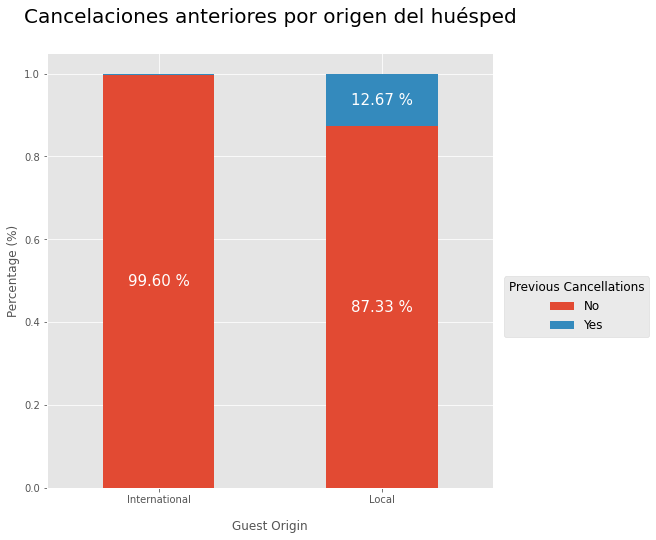

In [ ]:
guest_ax3 = pd.crosstab(df['guest_location'], df['previous_cancellations'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Previous Cancellations', fontsize=12, title_fontsize=12, labels=['No', 'Yes'])

j = 1
for p in guest_ax3.patches:
    if j == 1 or j == 2 or j == 4:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      guest_ax3.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white',
              fontsize=15)
    j += 1

plt.title('Cancelaciones anteriores por origen del huésped', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**

* Los clientes locales tienen una tasa de cancelación más alta que los clientes internacionales

* Si buscas la relación con otros atributos:
    - El tipo de depósito no reembolsable para clientes locales es más alto que para huéspedes internacionales
    - Las tarifas de las reservas de hotel canceladas anteriormente son más altas para los clientes locales que para los clientes internacionales
    - El tiempo medio de entrega no se ve muy diferente

### Huésped repetido y hotel

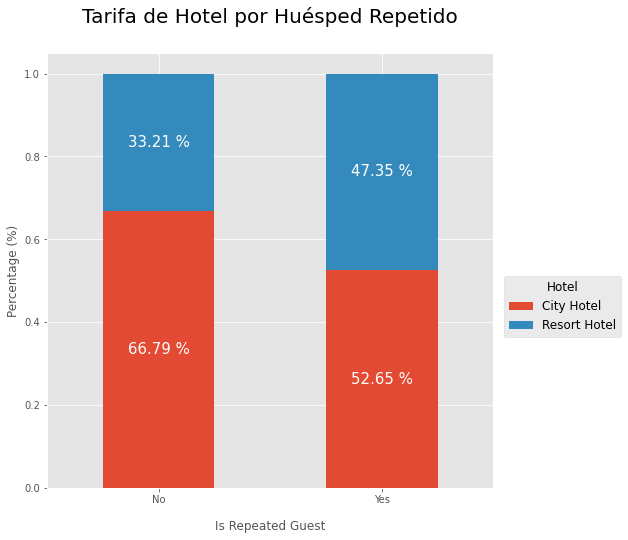

In [ ]:
repeat_ax = pd.crosstab(df['is_repeated_guest'], df['hotel'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Hotel', fontsize=12, title_fontsize=12, )
    
for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tarifa de Hotel por Huésped Repetido', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**

De la visualización anterior se obtiene la siguiente información:
* Es menos probable que los huéspedes repetidores cancelen en comparación con los huéspedes no repetidos
* La tasa de cancelación de huéspedes no repetidos es 2.5 veces mayor que la de huéspedes repetidos

### Segmento de Mercado y Hotel

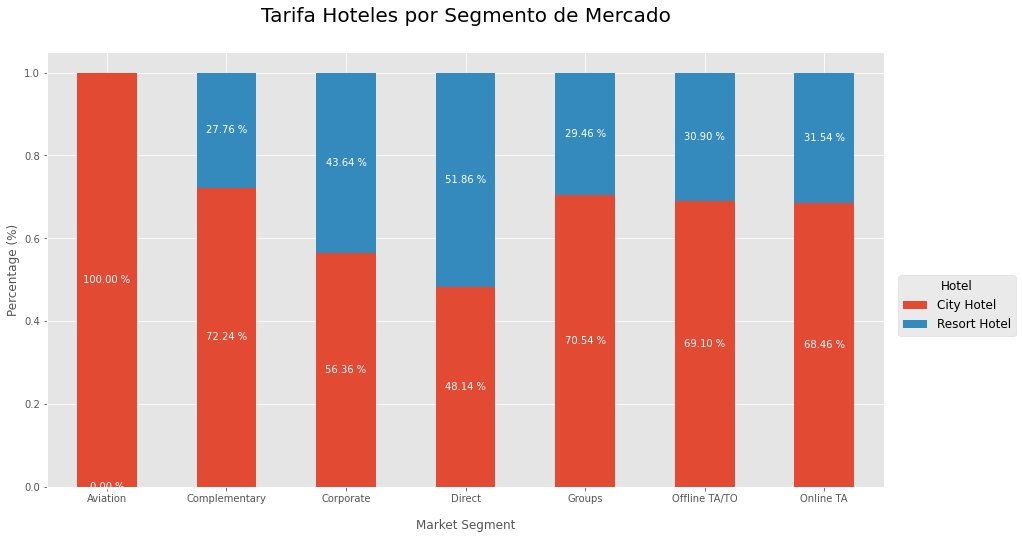

In [ ]:
market_ax = pd.crosstab(df['market_segment'], df['hotel'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Hotel', fontsize=12, title_fontsize=12)
    
for p in market_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    market_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Tarifa Hoteles por Segmento de Mercado', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Market Segment', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

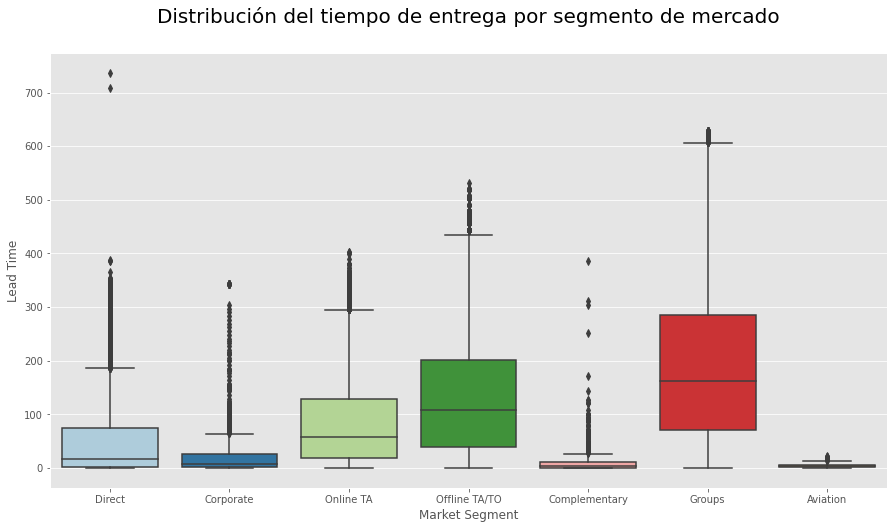

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='market_segment', y='lead_time', data=df, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Market Segment', fontsize=12)
plt.title('Distribución del tiempo de entrega por segmento de mercado', fontsize=20, pad=30)
plt.show()

**Conclusiones clave:**

* El grupo de segmento de mercado tiene la tasa de cancelación más alta, alcanzando el 61%. Se puede concluir porque tiene el tiempo medio de entrega más largo.
* El segmento de mercado directo tiene la tasa de cancelación más baja (diferente al complementario)

### Tipo de Cliente y Hotel

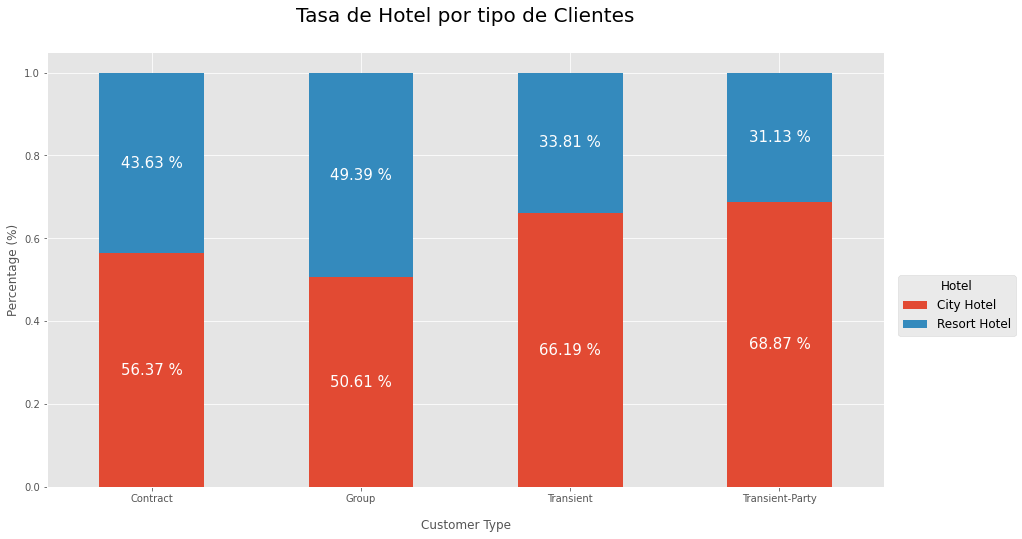

In [ ]:
hoteles_ax = pd.crosstab(df['customer_type'], df['hotel'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Hotel', fontsize=12, title_fontsize=12, )
    
for p in hoteles_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hoteles_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de Hotel por tipo de Clientes', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

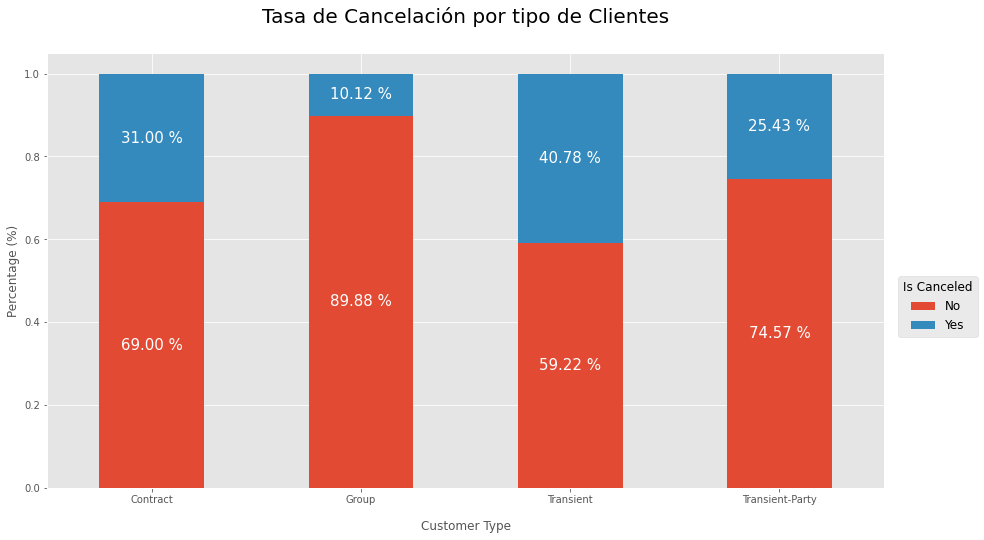

In [ ]:
customer_ax = pd.crosstab(df['customer_type'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in customer_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    customer_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de Cancelación por tipo de Clientes', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**
* El tipo de cliente transitorio presenta la tasa de cancelación más alta, alcanzando el 40,78%
* El grupo de tipo de cliente tiene la tasa de cancelación más baja

### Cambios y cancelaciones de reservas

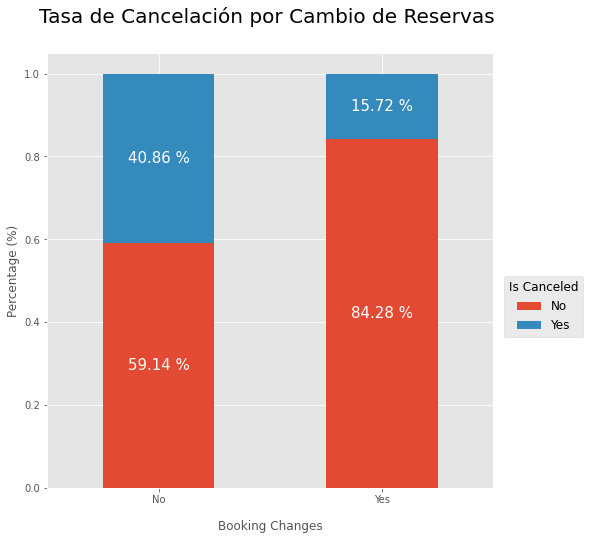

In [ ]:
booking_ax = pd.crosstab(df['booking_changes'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in booking_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    booking_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de Cancelación por Cambio de Reservas ', fontsize=20, pad=30)   
booking_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Booking Changes', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

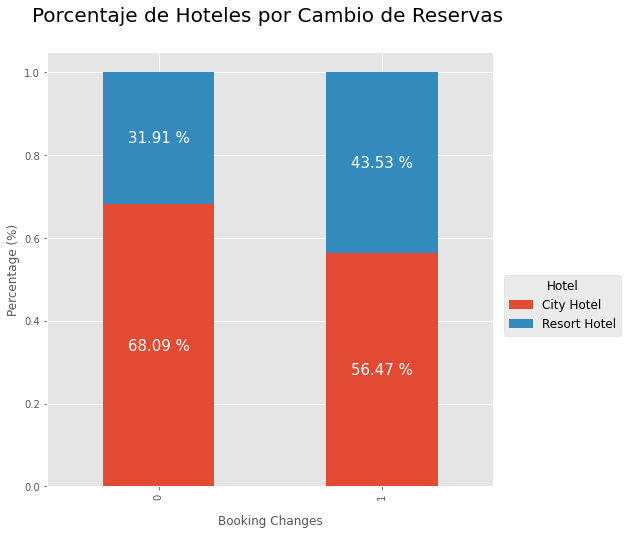

In [ ]:
hotel_ax = pd.crosstab(df['booking_changes'], df['hotel'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Hotel', fontsize=12, title_fontsize=12,)
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Porcentaje de Hoteles por Cambio de Reservas ', fontsize=20, pad=30)   
booking_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Booking Changes', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**
* Los clientes que realizan cambios en los detalles de la reserva tienen una tasa de cancelación menor que aquellos que no lo hacen

### Solicitud especial y cancelación

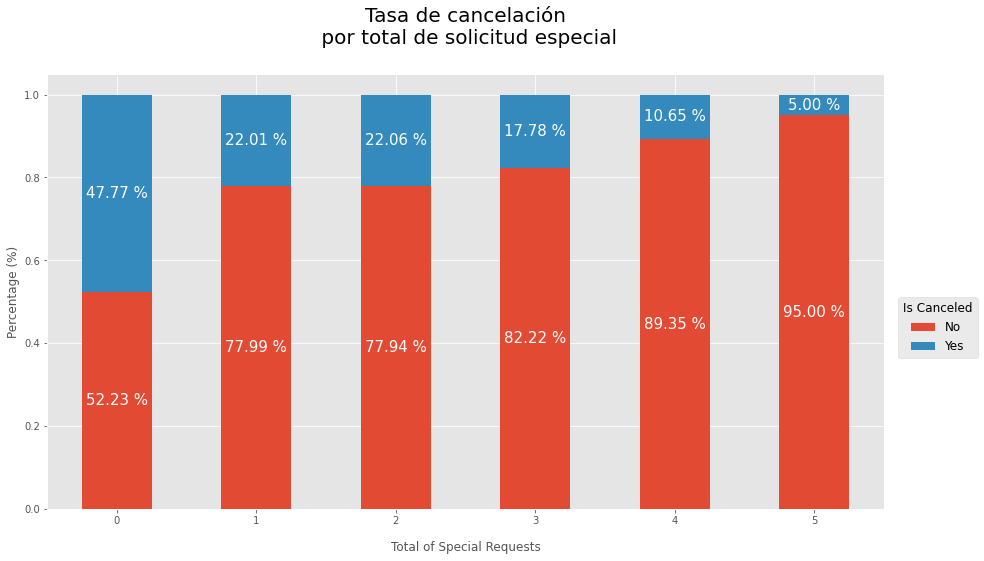

In [ ]:
request_ax = pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in request_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    request_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Tasa de cancelación\n por total de solicitud especial', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Total of Special Requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

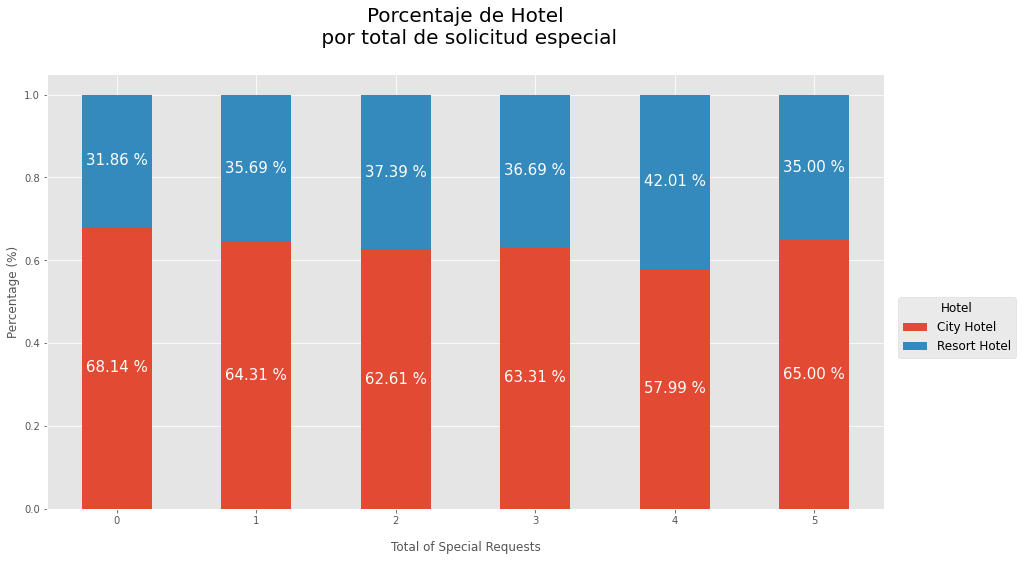

In [ ]:
ho_ax = pd.crosstab(df['total_of_special_requests'], df['hotel'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Hotel', fontsize=12, title_fontsize=12, )
    
for p in ho_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ho_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Porcentaje de Hotel\n por total de solicitud especial', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Total of Special Requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**
* Cuantos más clientes soliciten solicitudes especiales, menor será la tasa de cancelación

### Espacio de Parking y Cancelación

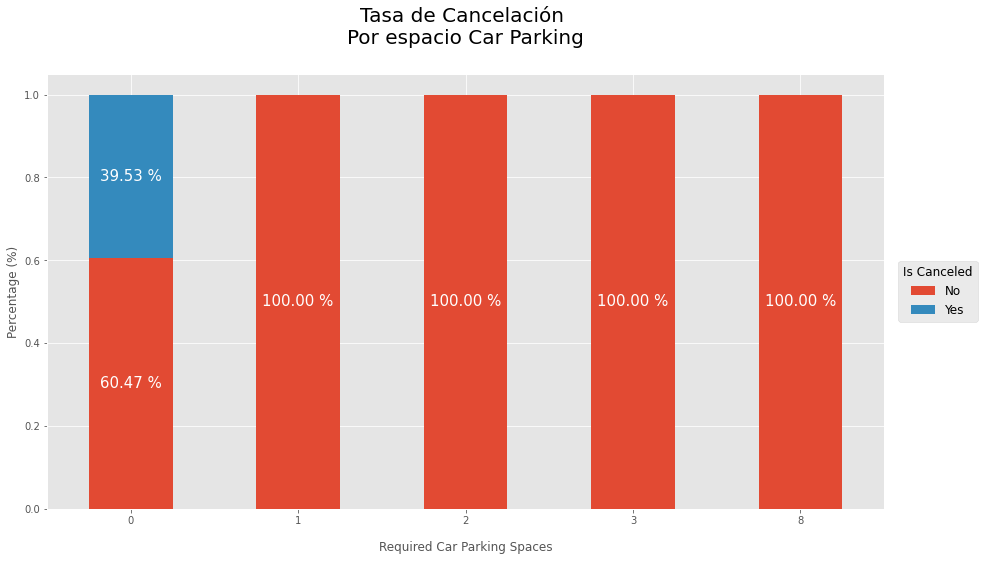

In [ ]:
parking_ax = pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in parking_ax.patches:
    if j < 7:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      parking_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
    
plt.title('Tasa de Cancelación \nPor espacio Car Parking', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Required Car Parking Spaces', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

### Tipo de comida y cancelación

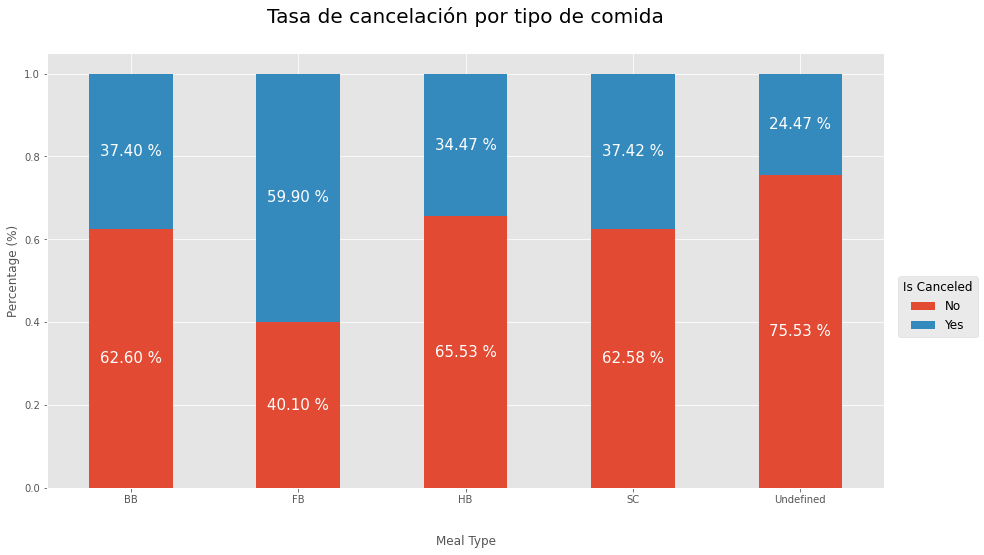

In [ ]:
meal_ax = pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12,labels=['No','Yes'])
   
for p in meal_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      meal_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    
plt.title('Tasa de cancelación por tipo de comida', fontsize=20, pad=30) 
plt.xticks(rotation=360)   
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

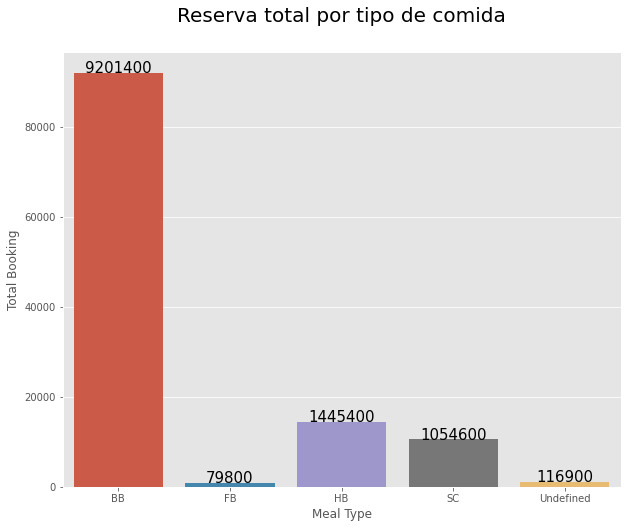

In [ ]:
plt.figure(figsize=(10, 8))
meal_ax2 = sns.countplot(df['meal'])

for p in meal_ax2.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      meal_ax2.text(x+width/2, 
              y+height, 
              '{:.0f}'.format(height*100), 
              horizontalalignment='center', 
              color = 'black', 
              fontsize=15)
      
plt.title('Reserva total por tipo de comida', fontsize=20, pad=30)    
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Total Booking', fontsize=12)
plt.show()

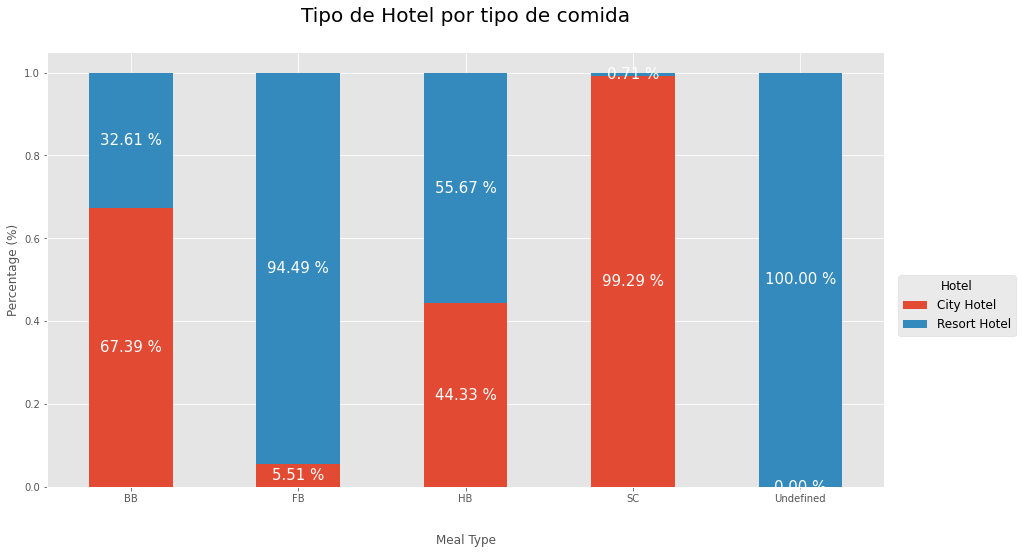

In [ ]:
mealhotel_ax = pd.crosstab(df['meal'], df['hotel'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Hotel', fontsize=12, title_fontsize=12,)
   
for p in mealhotel_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      mealhotel_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    
plt.title('Tipo de Hotel por tipo de comida', fontsize=20, pad=30) 
plt.xticks(rotation=360)   
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

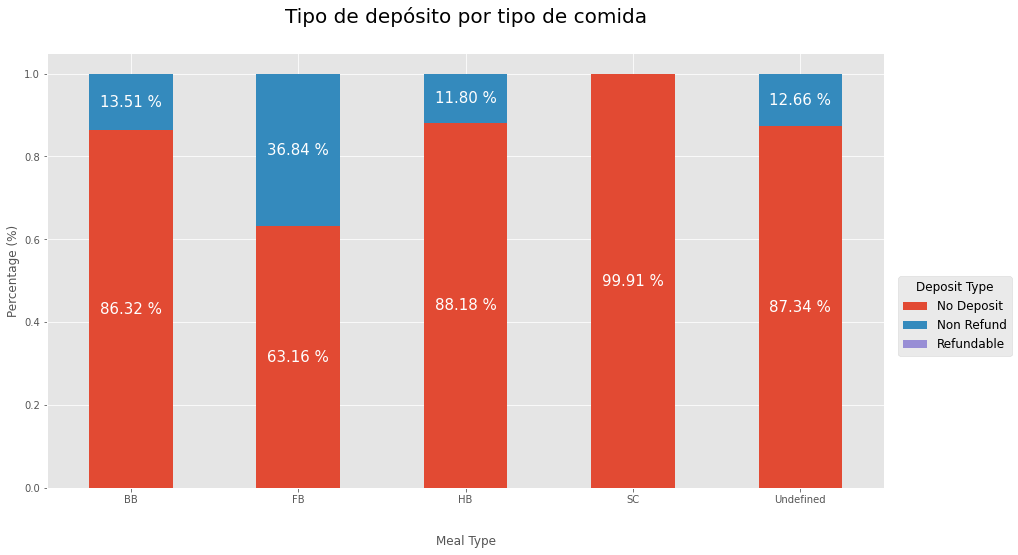

In [ ]:
meal_ax3 = pd.crosstab(df['meal'], df['deposit_type'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Deposit Type', fontsize=12, title_fontsize=12)

j = 1
for p in meal_ax3.patches:
      if j < 9 or j == 10: 
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        meal_ax3.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=15)
      j += 1

plt.title('Tipo de depósito por tipo de comida', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**

* La reserva de hotel con comida FB tiene la tasa de cancelación más alta en comparación con otras comidas.

* Se puede concluir porque las reservas de hotel con FB de comidas tienen un mayor ratio de depósitos de tipo no devolución. Del análisis anterior, la no devolución tiene una alta tasa de cancelación

### Distribución de canales & Cancelación

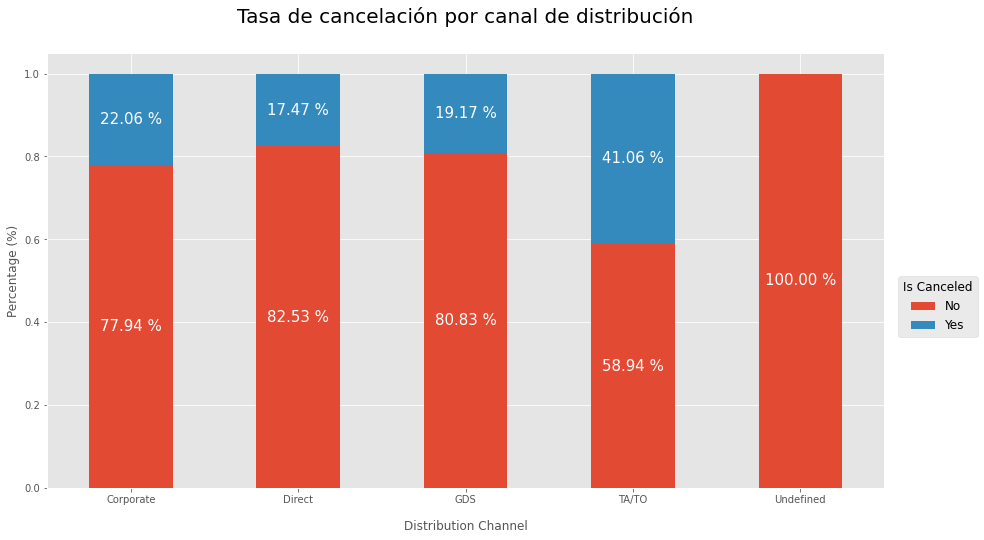

In [ ]:
distribution_ax = pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1   
for p in distribution_ax.patches:
      if j != 10:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        distribution_ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white', fontsize=15)
      j += 1
    
plt.title('Tasa de cancelación por canal de distribución', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Distribution Channel', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

**Conclusiones clave:**

* La mayor tasa de cancelación se encuentra en el canal de distribución de agentes de viajes/operadores turísticos
* El canal de distribución directo tiene la tasa de cancelación más baja
* Por indefinido no consideramos

# MODELOS



## Codificando Variables Categoricas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Manipulación y tratamiento de los Datos
import numpy as np
import pandas as pd

# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import os
import scipy as sp

# Tratamiento y manipulación de Fechas
import datetime

#Visualizamos todas las columnas
pd.set_option('display.max_columns',None)

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning con Python/DATA/hotel_booking_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118982 entries, 0 to 118981
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118982 non-null  object 
 1   is_canceled                     118982 non-null  int64  
 2   lead_time                       118982 non-null  int64  
 3   arrival_date_year               118982 non-null  int64  
 4   arrival_date_month              118982 non-null  object 
 5   arrival_date_week_number        118982 non-null  int64  
 6   arrival_date_day_of_month       118982 non-null  int64  
 7   adults                          118982 non-null  int64  
 8   meal                            118982 non-null  object 
 9   country                         118982 non-null  object 
 10  market_segment                  118982 non-null  object 
 11  distribution_channel            118982 non-null  object 
 12  is_repeated_gues

In [ ]:
#lets find the categorial features
list_1=list(df.columns)

list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
list_cate

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'guest_location']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,kids,guest_location
0,1,0,342,2015,5,27,1,2,0,135,3,1,0,0,0,2,2,3,0,0,0,0,2,0.0,0,0,1,121,0,2,0,1
1,1,0,737,2015,5,27,1,2,0,135,3,1,0,0,0,2,2,4,0,0,0,0,2,0.0,0,0,1,121,0,2,0,1
2,1,0,7,2015,5,27,1,1,0,59,3,1,0,0,0,0,2,0,0,0,0,0,2,75.0,0,0,1,122,1,1,0,0
3,1,0,13,2015,5,27,1,1,0,59,2,0,0,0,0,0,0,0,0,1,0,0,2,75.0,0,0,1,122,1,1,0,0
4,1,0,14,2015,5,27,1,2,0,59,6,3,0,0,0,0,0,0,0,1,0,0,2,98.0,0,1,1,123,2,2,0,0


In [ ]:
df=df.drop("reservation_status_date", axis=1)

In [ ]:
df.shape

(118982, 31)

In [ ]:
df=df.sample(frac=0.4)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stays,total_guests,kids,guest_location
0,1,0,342,2015,5,27,1,2,0,135,3,1,0,0,0,2,2,3,0,0,0,0,2,0.0,0,0,1,0,2,0,1
1,1,0,737,2015,5,27,1,2,0,135,3,1,0,0,0,2,2,4,0,0,0,0,2,0.0,0,0,1,0,2,0,1
2,1,0,7,2015,5,27,1,1,0,59,3,1,0,0,0,0,2,0,0,0,0,0,2,75.0,0,0,1,1,1,0,0
3,1,0,13,2015,5,27,1,1,0,59,2,0,0,0,0,0,0,0,0,1,0,0,2,75.0,0,0,1,1,1,0,0
4,1,0,14,2015,5,27,1,2,0,59,6,3,0,0,0,0,0,0,0,1,0,0,2,98.0,0,1,1,2,2,0,0


## División de los Datos en etiquetas

In [ ]:
y=df['is_canceled']
x=df.drop('is_canceled',axis=1)

# Division de los Datos para Entrenamiento y Prueba

Usamos el 20% para probar nuestro modelo y un 80 para el entrenamiento de nuestro modelos

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(666)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

95185
23797
95185
23797


# 1. Regresión Logística

***La regresión logística** es un modelo estadístico que en su forma básica utiliza una función logística para modelar una variable dependiente binaria, aunque existen muchas extensiones más complejas. En el análisis de regresión, la regresión logística (o regresión logit) es la estimación de los parámetros de un modelo logístico (una forma de regresión binaria).*

La regresión logística es un modelo lineal que realiza una clasificación pasando la salida de la regresión lineal a través de una función sigmoidea.
$$f(x)=\frac{1}{1+e^-x}$$

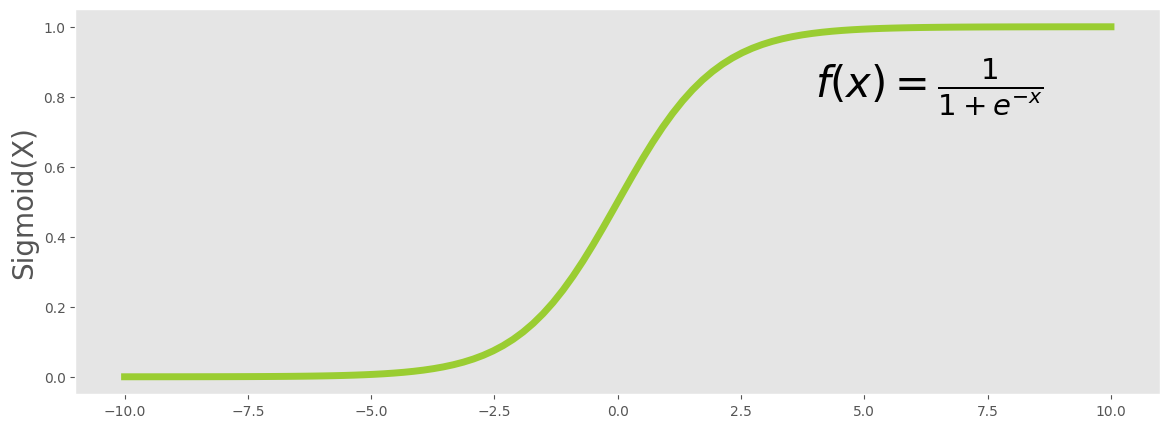

In [ ]:
#Gráfico de la función
import matplotlib.pyplot as plt 
import numpy as np 
import math 


x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x))

plt.figure(figsize=(14, 5))# ancho y altura
plt.plot(x, z, lw="5", color="yellowgreen") 
plt.grid()
#plt.title("Función Sigmoid", fontsize="20")
plt.text(4, 0.8, r'$f(x)=\frac{1}{1+e^{-x}}$', fontsize=30)
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.ylabel("Sigmoid(X)", fontsize="20") 

plt.show() 

Los pros y los contras de los algoritmos de regresión logística son los mismos que los del algoritmo de regresión lineal.

Para implementar la regresión lineal con Sklearn, puede usar la clase `LogisticRegression` del módulo sklearn.`linear_model`. Para entrenar el algoritmo, los conjuntos de entrenamiento y prueba, es decir, `X_train y X_test` en nuestro caso, se pasan al método `fit ()` del objeto de la clase `LogisticRegression`. El conjunto de prueba se pasa al método `predict ()` de la clase para realizar predicciones.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Llamamos al objeto
reg = LogisticRegression()

# Entrenamos al modelos
reg.fit(x_train,y_train)

# Haciendo predicciones
y_pred_reg=reg.predict(x_test)

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para evaluar un método de clasificación. Algunas de las métricas de clasificación más utilizadas son la métrica F1, recuperación, precisión, exactitud y confusión. Antes de ver las ecuaciones de estos términos, debe comprender el concepto de salidas de verdadero positivo, verdadero negativo, falso positivo y falso negativo:

## 1.1 Métricas

**Verdadero negativo: (TN / tn):** Los negativos verdaderos son aquellas etiquetas de salida que en realidad son falsas, y el modelo también las predijo como falsas.

**Verdadero positivo (TP):** los verdaderos positivos son aquellas etiquetas que son realmente verdaderas y que el modelo también predice como verdaderas.

**Falso negativo (FN):** los falsos negativos son etiquetas que son realmente verdaderas pero que los modelos de aprendizaje automático predicen como falsas.

**Falso positivo (FP):** las etiquetas que en realidad son falsas pero que el modelo predice como verdaderas se denominan falso positivo.

Una forma de analizar los resultados de un algoritmo de clasificación es trazando una matriz de confusión como la que se muestra a continuación:

In [ ]:
y_pred_reg

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test

71346     1
71643     1
67530     1
13590     1
10205     1
         ..
5049      1
67821     1
114027    0
113441    0
82136     1
Name: is_canceled, Length: 23797, dtype: int64

## 1.2 Resultados

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classificación de Reporte:\n",classification_report(y_test,y_pred_reg))

Classificación de Reporte:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     14948
           1       0.78      0.71      0.74      8849

    accuracy                           0.82     23797
   macro avg       0.81      0.79      0.80     23797
weighted avg       0.81      0.82      0.81     23797



In [ ]:
acc_reg = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score de la Regresión logística : {acc_reg}")

Accuracy Score de la Regresión logística : 0.816195318737656


## 1.3 Matriz de Confusión

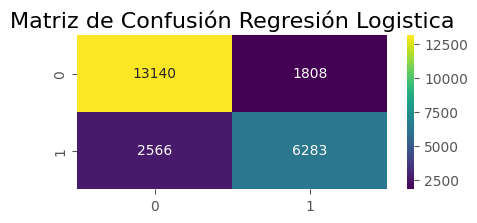

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred_reg), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

## 1.4 Otra Libreria
También podemos extraer más información de nuestro datos de la siguiente manera.

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
#log_clf = LogisticRegression()
log_clf_sm =sm.Logit(y_train,x_train)
classifier_sm = log_clf_sm.fit()

y_pred_sm = classifier_sm.predict(x_test)

print(classifier_sm.summary2())

         Current function value: 0.121185
         Iterations: 35
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.816     
Dependent Variable:           is_canceled               AIC:                       23127.9534
Date:                         2023-05-24 01:30          BIC:                       23402.3972
No. Observations:             95185                     Log-Likelihood:            -11535.   
Df Model:                     28                        LL-Null:                   -62746.   
Df Residuals:                 95156                     LLR p-value:               0.0000    
Converged:                    0.0000                    Scale:                     1.0000    
No. Iterations:               35.0000                                                        
---------------------------------------------------------------------------------------------
                                Co

## 1.5 Curva de ROC
Podemos gráficar una curva ROC para un modelo en Python usando la función `roc_curve ()` scikit-learn.

La función toma tanto los resultados verdaderos (0,1) del conjunto de prueba como las probabilidades predichas para la clase 1. La función devuelve las tasas de falsos positivos para cada umbral, las tasas de verdaderos positivos para cada umbral y los umbrales.

El AUC para el ROC se puede calcular usando la función `roc_auc_score ()` .

Al igual que la función roc_curve (), la función AUC toma tanto los resultados verdaderos (0,1) del conjunto de prueba como las probabilidades predichas para la clase 1. Devuelve la puntuación AUC entre 0,0 y 1,0 para ninguna habilidad y habilidad perfecta, respectivamente



In [ ]:
# revisar la libreria 
from sklearn.metrics import plot_roc_curve
plot_roc_curve(reg , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

ImportError: ignored

# 2. Árbol de Decisón

## 2.1 Introducción
Un árbol de decisión es una estructura de datos jerárquica que implementa la estrategia divide y vencerás. Es un método no paramétrico utilizado para clasificación y regresión. Un árbol de decisión consta de nodos de decisión internos y hojas terminales. Cada nodo de decisión implementa una función de prueba con diferentes resultados que etiqueta las ramas. Dada una entrada, se ejecuta una prueba en cada nodo y, según el resultado, se toma una de las ramas. Este proceso comienza en la raíz y se repite iterativamente hasta que llega a un nodo hoja.

> En la estimación paramétrica, definimos un modelo sobre todo el campo de entrada y aprendemos sus parámetros de todos los datos de entrenamiento. En la estimación no paramétrica, dividimos el espacio de entrada en regiones locales definidas por una medida de distancia como la norma euclidiana, y para cada entrada se utilizan los modelos locales correspondientes calculados a partir de los datos de entrenamiento en esa región.

Un árbol de decisión se considera óptimo cuando representa la mayor cantidad de datos con la menor cantidad de preguntas. Los algoritmos diseñados para generar árboles de decisión optimizados.

* El árbol de decisión debe identificar el punto óptimo para dividir los datos en cada nivel. Lo hace con una de las técnicas gini, ganancia de información y reducción de varianza.

### 2.1.1 Gini
---
Es una medida de la frecuencia con la que se etiquetará incorrectamente un elemento seleccionado al azar del conjunto. El Gini se calcula con la siguiente fórmula:

$$Gini=1-\sum_{j}p_{j}^{2}$$  

- $P_j$ es la probabilidad de la clase $j$.  

El valor mínimo del índice de Gini es 0. Si el valor es cero, indica que todos los datos tienen una sola etiqueta. En este caso, el nodo no se vuelve a dividir y la solución óptima se elige por características con menos valores de gini. Si hay cantidades iguales de dos clases (0-1), el índice de gini toma el valor máximo

### 2.1.2 Entropy

---
Calculamos la entropía usando la siguiente fórmula:


$$Entropy(D_1)=-\sum_{i=1}^{m}p_i log_2 p_i$$


* Debido a que Entropy usa logaritmos, es más difícil de calcular. La idea básica, como Gini, es medir el desorden de un grupo frente a la variable objetivo. Nuevamente, al igual que Gini, la distribución óptima está determinada por la característica con menor valor de Entropía, cuando la probabilidad de las dos clases es la misma, la Entropía máxima es, y si los datos consisten en una etiqueta que pertenece a una sola clase, el nodo es puro, el mínimo de Entropía es 0.

## 2.2 Ventajas y Desventajas
**Ventajas del árbol de decisiones**

  * Realiza indirectamente escaneo variable o selección de funciones.
  * Puede procesar datos numéricos y categóricos y encontrar una solución al problema de salida múltiple.
  * Requiere poco esfuerzo en partes de preprocesamiento de datos.
  * No afectado por valores atípicos y observaciones faltantes
  * Las relaciones no lineales entre parámetros no afectan el rendimiento del árbol.

**Desventajas del Árbol de Decisión**

* Los árboles de decisión pueden formar árboles complejos cuyos datos no están generalizados, lo que introduce el problema de sobreajuste.
* Los árboles de decisión pueden ser inestables porque pequeños cambios en los datos pueden dar como resultado un árbol completamente diferente. Esto se denomina la varianza que debe reducirse mediante los métodos de ensacado y aumento.
* Si algunas clases son dominantes en el conjunto de datos, pueden ocurrir árboles de decisión sesgados. Sería bueno equilibrar el conjunto de datos antes de crear el árbol de decisión.

## 2.3 Implementación de Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Llamamo al objeto clasificador
dtree = DecisionTreeClassifier(max_depth=2, random_state=123, criterion='entropy')

# Entrenamos el modelo
dtree.fit(x_train,y_train)

# Hacemos predicciones
y_pred_dt=dtree.predict(x_test)

In [ ]:
x_train.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_stays', 'total_guests', 'kids',
       'guest_location'],
      dtype='object')

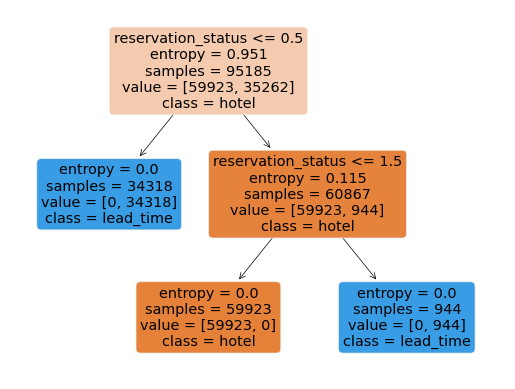

In [ ]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = x_train.columns,class_names =['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_stays', 'total_guests', 'kids',
       'guest_location', 'lead_time_month']
                     , filled = True , precision = 3, rounded = True)

## 2.4 Resultados

In [ ]:
clf =print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23797
   macro avg       1.00      1.00      1.00     23797
weighted avg       1.00      1.00      1.00     23797



### 2.4.1 Matriz de Confusión

In [ ]:
acc_dt=accuracy_score(y_test,y_pred_dt)
print(f"Accuracy Score de Decision Tree es : {acc_dt}")

Accuracy Score de Decision Tree es : 1.0


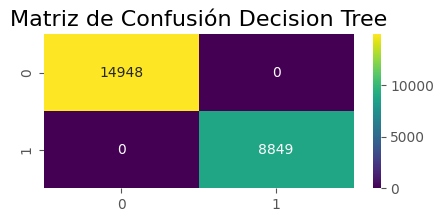

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Decision Tree", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();


### 2.4.2 Curva ROC

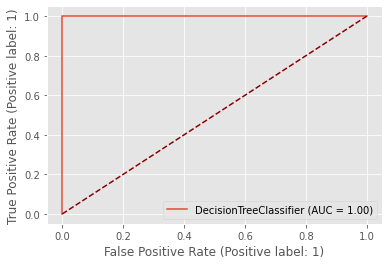

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtree , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# 3. Support Vector Machines
La máquina de vectores de soporte es la clasificación y los algoritmos de regresión, lo que minimiza el error entre las predicciones reales y las predicciones al maximizar la distancia entre hiperplanos que contienen datos para varios registros.

Con la biblioteca Sklearn, puede usar el módulo SVM para implementar el algoritmo de clasificación de vectores de soporte, como se muestra a continuación. La clase SVC del módulo SVM se utiliza para implementar la clasificación de vectores de soporte.

**¿Qué es la máquina de vectores de soporte?**

La "Máquina de vectores de soporte" (SVM) es un algoritmo de aprendizaje automático supervisado que se puede usar para desafíos de clasificación o regresión. Sin embargo, se utiliza principalmente en problemas de clasificación. En el algoritmo SVM, trazamos cada elemento de datos como un punto en un espacio n-dimensional (donde n es una cantidad de características que tiene) y el valor de cada característica es el valor de una coordenada particular. Luego, realizamos la clasificación encontrando el hiperplano que diferencia muy bien las dos clases (mire la instantánea a continuación).

Los vectores de soporte son simplemente las coordenadas de la observación individual. El clasificador SVM es una frontera que segrega mejor las dos clases (hiperplano/línea).

Puede ver las máquinas de vectores de soporte y algunos ejemplos de su funcionamiento aquí.



**¿Cómo ajustar los parámetros de SVM?**
Ajustar los valores de los parámetros para los algoritmos de aprendizaje automático mejora efectivamente el rendimiento del modelo. Veamos la lista de parámetros disponibles con SVM.

`sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)`

**kernel:** Ya lo hemos discutido. Aquí, tenemos varias opciones disponibles con kernel como "linear", "rbf", "poly" y otras (el valor predeterminado es "rbf"). Aquí "rbf" y "poly" son útiles para el hiperplano no lineal. Veamos el ejemplo, donde hemos usado kernel lineal en dos características del conjunto de datos de iris para clasificar su clase.

**Pros y contras asociados con SVM**

* Ventajas:
  * Funciona muy bien con un claro margen de separación.
  * Es efectivo en espacios de altas dimensiones.
  * Es eficaz en los casos en que el número de dimensiones es mayor que el número de muestras.
  * Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también es eficiente en memoria.
* Contras:
  * No funciona bien cuando tenemos un gran conjunto de datos porque el tiempo de entrenamiento requerido es mayor
  * Tampoco funciona muy bien cuando el conjunto de datos tiene más ruido, es decir, las clases objetivo se superponen.
  * SVM no proporciona directamente estimaciones de probabilidad, estas se calculan mediante una costosa validación cruzada de cinco veces. Se incluye en el método SVC relacionado de la biblioteca Python scikit-learn.

In [ ]:
from sklearn import svm

# Llamamos al objeto
svm_clf = svm.SVC()

# Entrenamos al modelo
classifier = svm_clf.fit(x_train, y_train)

# Haciendo predicciones con el conjunto de prueba
y_pred_svm = classifier.predict(x_test)

## 3.1 Resultados

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
clf =print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81     14948
           1       0.73      0.41      0.53      8849

    accuracy                           0.72     23797
   macro avg       0.73      0.66      0.67     23797
weighted avg       0.73      0.72      0.70     23797



### 3.1.1 Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc_svm=accuracy_score(y_test,y_pred_svm)
print(f"Accuracy Score de SVM es : {acc_svm}")

Accuracy Score de SVM es : 0.7247552212463756


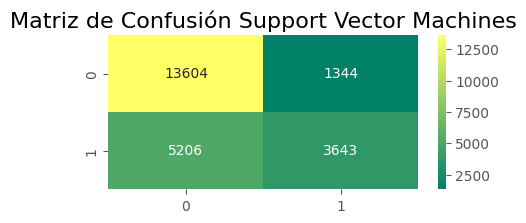

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Support Vector Machines", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot = True, cmap ='summer',fmt = '.0f')
    
plt.show();

### 3.1.2 Curva ROC

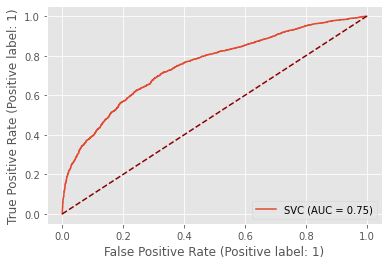

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm_clf , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

 # 4.Random Forest


Al igual que el regresor de bosque aleatorio, el clasificador de bosque aleatorio es un algoritmo basado en árboles que convierte entidades en nodos de árboles y luego utiliza la pérdida de entropía para realizar predicciones de clasificación.

La clase `RandomForestClassifier` del módulo Sklearn.ensemble se puede usar para implementar el algoritmo regresor de bosque aleatorio en Python, como se muestra a continuación.

poner imgen

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

# Llamando al objeto clasificador
rfc=RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=-1)

# Entrenamiento del modelo
rfc.fit(x_train,y_train)

# Haciendo predicciones
y_pred_rf=rfc.predict(x_test)

## 4.1 Resultados

In [ ]:
clf =print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23797
   macro avg       1.00      1.00      1.00     23797
weighted avg       1.00      1.00      1.00     23797



### 4.1.1 Matriz de Confusión

In [ ]:
acc_rfc= accuracy_score(y_test,y_pred_rf)
print(f"Accuracy Score de Random Forest es : {acc_rfc}")

Accuracy Score de Random Forest es : 1.0


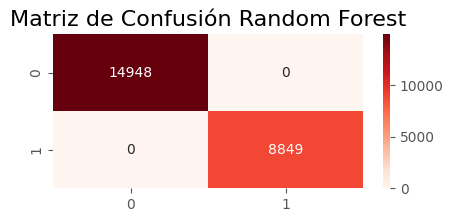

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Random Forest", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, cmap ='Reds',fmt = '.0f')
    
plt.show();

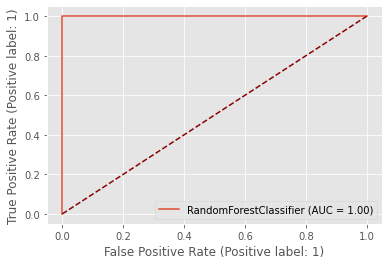

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# 5. AdaBoost

*Un clasificador AdaBoost es un metaestimador que comienza ajustando un clasificador en el conjunto de datos original y luego ajusta copias adicionales del clasificador en el mismo conjunto de datos, pero donde los pesos de las instancias clasificadas incorrectamente se ajustan de modo que los clasificadores posteriores se enfocan más en las situaciones difíciles. casos.*

In [ ]:
# Revisar el codigo
from sklearn.ensemble import AdaBoostClassifier

# Llamamo al objeto clasificador
adb = AdaBoostClassifier(n_estimators=100, random_state=0)

# Entrenamos al modelo
adb.fit(x_train,y_train)

# Hacemos predicciones
y_pred_adb=adb.predict(x_test)

## 5.1 Resultado 

In [ ]:
clf =print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23797
   macro avg       1.00      1.00      1.00     23797
weighted avg       1.00      1.00      1.00     23797



## 5.2 Matriz de Confusión

In [ ]:
acc_adb = accuracy_score(y_test,y_pred_adb)
print(f"Accuracy Score de AdaBoost es :{acc_adb}")

Accuracy Score de AdaBoost es :1.0


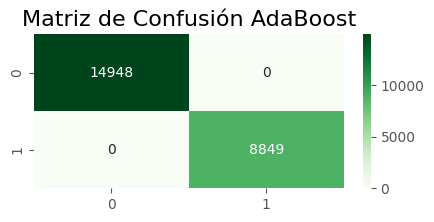

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión AdaBoost", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_adb), annot = True, cmap ='Greens',fmt = '.0f')
    
plt.show();

## 5.3 Curva Roc

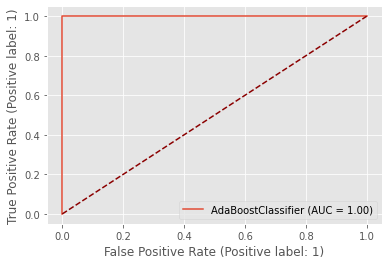

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(adb , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# 6. Gradient Boosting

*Los clasificadores de aumento de gradiente son un grupo de algoritmos de aprendizaje automático que combinan muchos modelos de aprendizaje débiles para crear un modelo predictivo sólido. Los árboles de decisión se utilizan generalmente cuando se realiza un aumento de gradiente.*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Llamamos al clasificador
gbc=GradientBoostingClassifier()

# Entrenamos al modelo
gbc.fit(x_train,y_train)

# Hacemos predicciones
y_pred_gbc=gbc.predict(x_test)

## 6.1 Resultado

In [ ]:
clf =print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5913
           1       1.00      1.00      1.00      3606

    accuracy                           1.00      9519
   macro avg       1.00      1.00      1.00      9519
weighted avg       1.00      1.00      1.00      9519



## 6.2 Matriz de Confusión

In [ ]:
acc_gbc = accuracy_score(y_test,y_pred_gbc)
print(f"Accuracy Score de GradientBoosting es :{acc_gbc}")

Accuracy Score de GradientBoosting es :1.0


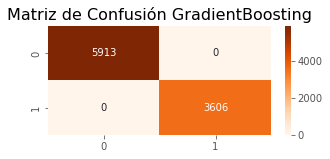

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión GradientBoosting", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot = True, cmap ='Oranges',fmt = '.0f')
    
plt.show();

## 6.3 Curva Roc

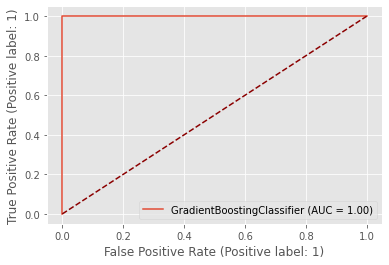

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# 7. XGBoost

*XGBoost es una implementación de código abierto popular y eficiente del algoritmo de árboles impulsados por gradientes. El aumento de gradiente es un algoritmo de aprendizaje supervisado que intenta predecir con precisión una variable objetivo combinando las estimaciones de un conjunto de modelos más simples y débiles.*

In [ ]:
from xgboost import XGBClassifier
#np.random.seed(9666)
# Llamamos al clasificar
xgb =XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Entrenamos al Modelo
xgb.fit(x_train, y_train)

# Haciendo predicciones
y_pred_xgb=xgb.predict(x_test)

## 7.1 Resultado

In [ ]:
clf =print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     14948
           1       1.00      0.87      0.93      8849

    accuracy                           0.95     23797
   macro avg       0.96      0.93      0.95     23797
weighted avg       0.95      0.95      0.95     23797



## 7.2 Matriz de Confusión

In [ ]:
acc_xgb = accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy Score de XGB es :{acc_xgb}")

Accuracy Score de XGB es :0.9503298735134681


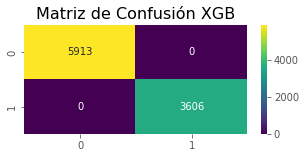

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión XGB", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

## 7.3 Curva Roc

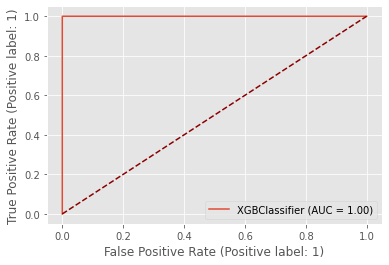

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# 8. ExtraTrees

*El clasificador de árboles extremadamente aleatorizados (clasificador de árboles adicionales) es un tipo de técnica de aprendizaje conjunto que agrega los resultados de múltiples árboles de decisión des-correlacionados recolectados en un "bosque" para generar su resultado de clasificación.*

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Llamamos la objeto clasificador
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Entrenamos al modelo
etc.fit(x_train,y_train)

# Haciendo predicciones
y_pred_ex=etc.predict(x_test)

## 8.1 Resultado

In [ ]:
clf =print(classification_report(y_test, y_pred_ex))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23797
   macro avg       1.00      1.00      1.00     23797
weighted avg       1.00      1.00      1.00     23797



## 8.2 Matriz de Confusión

In [ ]:
acc_etc = accuracy_score(y_test,y_pred_ex)
print(f"Accuracy Score de Extra Trees es :{acc_etc}")

Accuracy Score de Extra Trees es :1.0


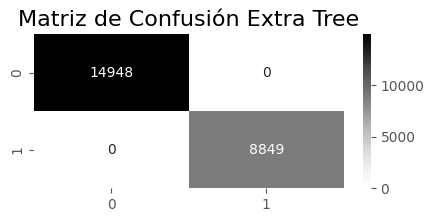

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Extra Tree", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_ex), annot = True, cmap ='Greys',fmt = '.0f')
    
plt.show();

## 8.3 Curva ROC

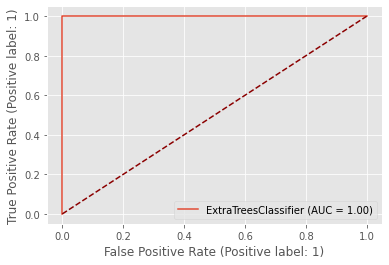

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(etc , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# 9.Bagging

*Un clasificador de Bagging es un metaestimador de conjunto que ajusta a los clasificadores base cada uno en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales (ya sea por votación o promediando) para formar una predicción final. ... El estimador base para ajustarse a subconjuntos aleatorios del conjunto de datos.*

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Llamamos al objeto clasificador
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))

# Entrenamos al modelo
bag.fit(x_train, y_train)

# Hacemos predicciones
y_pred_bag=bag.predict(x_test)

## 9.1 Resultados

In [ ]:
baggin =print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23797
   macro avg       1.00      1.00      1.00     23797
weighted avg       1.00      1.00      1.00     23797



## 9.2 Matriz de Confusión

In [ ]:
acc_bag = accuracy_score(y_test,y_pred_bag)
print(f"Accuracy Score de Bagging es :{acc_etc}")

Accuracy Score de Bagging es :1.0


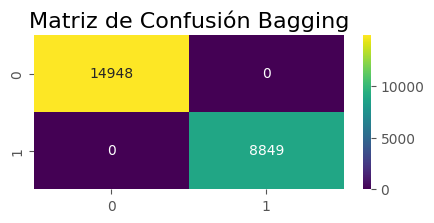

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Bagging", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_bag), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

## 9.3 Curva Roc

In [ ]:
# 
from sklearn.metrics import plot_roc_curve
plot_roc_curve(bag , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

ImportError: ignored

# RESULTADO : 
Acá eligiremos e modelo que tenga la Accuracy más alto, para luego hacer algunas predicciones


In [ ]:
# revisar
models = pd.DataFrame({
    'Model': ['Regresión logistica','Decision Tree',"Support Vector",'Random Forest','AdaBoost',
              'XGB',"Extra tree","Bagging"], # 'Gradient Boosting'
              'Accuracy': [acc_reg,  acc_dt,acc_svm, acc_rfc, acc_adb,  acc_xgb,  # acc_gbc
             acc_etc, acc_bag ]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,1.000000
3,Random Forest,1.000000
4,AdaBoost,1.000000
6,Extra tree,1.000000
7,Bagging,1.000000
5,XGB,0.950330
0,Regresión logistica,0.816195
2,Support Vector,0.724755


In [ ]:
import plotly.express as px
fig = px.bar (models, x="Model", 
                   y="Accuracy", 
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'], 
                   title='Accuracy de los Modelos')
fig.update_layout(bargap=0.6)
fig.show()

In [ ]:
x_train.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stays,total_guests,kids,guest_location
44122,0,30,2015,11,40,30,2,2,135,5,3,0,0,0,0,0,0,1,1,0,0,2,121.0,0,0,0,2,2,0,1
72915,0,201,2017,1,32,9,3,0,123,6,3,0,0,0,3,3,0,0,1,0,0,2,175.5,0,0,0,4,3,0,0


In [ ]:
cliente=pd.DataFrame({"cl1":[0,316,2016,8,22,26,2,0,12,4,3,0,0,0,0,0,0,0,1,0,0,3,110,0,0,1,3,2,0,0],
                      "cl2":[1,47,2015,2,12,10,2,1,12,4,3,1,1,1,1,1,1,1,0,1,1,4,55,1,1,0,4,2,1,1] })
cliente

,cl1,cl2
0,0,1
1,316,47
2,2016,2015
3,8,2
4,22,12
5,26,10
6,2,2
7,0,1
8,12,12
9,4,4


In [ ]:
cliente.shape

(31, 2)

In [ ]:
dtree.predict(cliente.T) # 0 No Reserva
                       #1 reserva

array([0, 1])

#DATA & ANALYTICS





Web: www.datayanalytics.com